<a href="https://colab.research.google.com/github/solaripynb/SolarRadianceForecaster/blob/main/SolarRadianceForecaster_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Solar Radiation Forecasting Model:

**Note to Stakeholders and Interested Parties:**

This Notebook serves as a simplified, illustrative example of the foundational solar radiation forecasting model I've developed. Several key portions of the code, including advanced feature engineering steps, model-building strategies, and evaluation metrics, have been redacted or abbreviated.

If you're interested in exploring the full capabilities of this or other models, including more in-depth technical details and how it can be adapted to meet your specific needs, I invite you to contact me directly.

You can reach out via [LinkedIn](https://www.linkedin.com/in/sergiodavidescobar) for a comprehensive walkthrough and potential collaboration.

**Thank you for your interest, and I look forward to the possibility of working together to advance solar energy forecasting.**



# Data Preparation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the dataset
data_path = 'dataset source: PVGIS-SARAH2'
df = pd.read_csv(data_path, parse_dates=['time'], index_col='time')

In [ ]:
# Filter the dataset for the time range from 2012 to 2020
df_filtered = df['2012-01-01':'2020-12-31']

# Display first few rows of the filtered dataset
df_filtered.head()

Gb(i)  Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int
time                                                             
2012-01-01 00:10:00    0.0    0.0    0.0    0.0  7.13   1.10  0.0
2012-01-01 01:10:00    0.0    0.0    0.0    0.0  6.95   1.10  0.0
2012-01-01 02:10:00    0.0    0.0    0.0    0.0  7.29   1.03  0.0
2012-01-01 03:10:00    0.0    0.0    0.0    0.0  7.51   0.90  0.0
2012-01-01 04:10:00    0.0    0.0    0.0    0.0  7.20   0.97  0.0

# Feature Engineering

## Lagged Features:

In [ ]:
# Columns to be lagged
lag_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']

# Lag periods in terms of the number of rows (each row corresponds to 60 minutes)
lag_periods = [1, 3, 6]  # corresponding to 1, 3, and 6 hours

# Generate lagged features
for col in lag_columns:
    for lag in lag_periods:
        lag_col_name = f"{col}_lag{lag}"
        #df_filtered.... continue

In [ ]:
df_filtered.head(10)

Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int  \
time                                                                  
2012-01-01 00:10:00    0.00    0.00   0.00   0.00  7.13   1.10  0.0   
2012-01-01 01:10:00    0.00    0.00   0.00   0.00  6.95   1.10  0.0   
2012-01-01 02:10:00    0.00    0.00   0.00   0.00  7.29   1.03  0.0   
2012-01-01 03:10:00    0.00    0.00   0.00   0.00  7.51   0.90  0.0   
2012-01-01 04:10:00    0.00    0.00   0.00   0.00  7.20   0.97  0.0   
2012-01-01 05:10:00    0.00    0.00   0.00   0.00  7.04   0.97  0.0   
2012-01-01 06:10:00    0.00    0.00   0.00   0.00  7.13   0.90  0.0   
2012-01-01 07:10:00    0.00    0.00   0.00   0.00  4.61   1.52  0.0   
2012-01-01 08:10:00  301.19   51.05   2.72   3.83  3.40   1.72  0.0   
2012-01-01 09:10:00  579.90  134.09   9.70  12.99  4.62   1.24  0.0   

                     Gb(i)_lag1  Gb(i)_lag3  Gb(i)_lag6  ...  Gr(i)_lag6  \
time                                                     ...               
2012-01-01 00:10:00         NaN         NaN         NaN  ...         NaN   
2012-01-01 01:10:00        0.00         NaN         NaN  ...         NaN   
2012-01-01 02:10:00        0.00         NaN         NaN  ...         NaN   
2012-01-01 03:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 04:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 05:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 06:10:00        0.00         0.0         0.0  ...         0.0   
2012-01-01 07:10:00        0.00         0.0         0.0  ...         0.0   
2012-01-01 08:10:00        0.00         0.0         0.0  ...         0.0   
2012-01-01 09:10:00      301.19         0.0         0.0  ...         0.0   

                     H_sun_lag1  H_sun_lag3  H_sun_lag6  T2m_lag1  T2m_lag3  \
time                                                                          
2012-01-01 00:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 01:10:00        0.00         NaN         NaN      7.13       NaN   
2012-01-01 02:10:00        0.00         NaN         NaN      6.95       NaN   
2012-01-01 03:10:00        0.00         0.0         NaN      7.29      7.13   
2012-01-01 04:10:00        0.00         0.0         NaN      7.51      6.95   
2012-01-01 05:10:00        0.00         0.0         NaN      7.20      7.29   
2012-01-01 06:10:00        0.00         0.0         0.0      7.04      7.51   
2012-01-01 07:10:00        0.00         0.0         0.0      7.13      7.20   
2012-01-01 08:10:00        0.00         0.0         0.0      4.61      7.04   
2012-01-01 09:10:00        3.83         0.0         0.0      3.40      7.13   

                     T2m_lag6  WS10m_lag1  WS10m_lag3  WS10m_lag6  
time                                                               
2012-01-01 00:10:00       NaN         NaN         NaN         NaN  
2012-01-01 01:10:00       NaN        1.10         NaN         NaN  
2012-01-01 02:10:00       NaN        1.10         NaN         NaN  
2012-01-01 03:10:00       NaN        1.03        1.10         NaN  
2012-01-01 04:10:00       NaN        0.90        1.10         NaN  
2012-01-01 05:10:00       NaN        0.97        1.03         NaN  
2012-01-01 06:10:00      7.13        0.97        0.90        1.10  
2012-01-01 07:10:00      6.95        0.90        0.97        1.10  
2012-01-01 08:10:00      7.29        1.52        0.97        1.03  
2012-01-01 09:10:00      7.51        1.72        0.90        0.90  

[10 rows x 25 columns]

## Temporal Features:

In [ ]:
# Generate temporal features
df_filtered['hour_of_day'] = #df_filtered.... continue
df_filtered['day_of_week'] = #df_filtered.... continue
df_filtered['month'] = #df_filtered.... continue
df_filtered['quarter'] = #df_filtered.... continue

In [ ]:
df_filtered.head(10)

Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int  \
time                                                                  
2012-01-01 00:10:00    0.00    0.00   0.00   0.00  7.13   1.10  0.0   
2012-01-01 01:10:00    0.00    0.00   0.00   0.00  6.95   1.10  0.0   
2012-01-01 02:10:00    0.00    0.00   0.00   0.00  7.29   1.03  0.0   
2012-01-01 03:10:00    0.00    0.00   0.00   0.00  7.51   0.90  0.0   
2012-01-01 04:10:00    0.00    0.00   0.00   0.00  7.20   0.97  0.0   
2012-01-01 05:10:00    0.00    0.00   0.00   0.00  7.04   0.97  0.0   
2012-01-01 06:10:00    0.00    0.00   0.00   0.00  7.13   0.90  0.0   
2012-01-01 07:10:00    0.00    0.00   0.00   0.00  4.61   1.52  0.0   
2012-01-01 08:10:00  301.19   51.05   2.72   3.83  3.40   1.72  0.0   
2012-01-01 09:10:00  579.90  134.09   9.70  12.99  4.62   1.24  0.0   

                     Gb(i)_lag1  Gb(i)_lag3  Gb(i)_lag6  ...  T2m_lag1  \
time                                                     ...             
2012-01-01 00:10:00         NaN         NaN         NaN  ...       NaN   
2012-01-01 01:10:00        0.00         NaN         NaN  ...      7.13   
2012-01-01 02:10:00        0.00         NaN         NaN  ...      6.95   
2012-01-01 03:10:00        0.00         0.0         NaN  ...      7.29   
2012-01-01 04:10:00        0.00         0.0         NaN  ...      7.51   
2012-01-01 05:10:00        0.00         0.0         NaN  ...      7.20   
2012-01-01 06:10:00        0.00         0.0         0.0  ...      7.04   
2012-01-01 07:10:00        0.00         0.0         0.0  ...      7.13   
2012-01-01 08:10:00        0.00         0.0         0.0  ...      4.61   
2012-01-01 09:10:00      301.19         0.0         0.0  ...      3.40   

                     T2m_lag3  T2m_lag6  WS10m_lag1  WS10m_lag3  WS10m_lag6  \
time                                                                          
2012-01-01 00:10:00       NaN       NaN         NaN         NaN         NaN   
2012-01-01 01:10:00       NaN       NaN        1.10         NaN         NaN   
2012-01-01 02:10:00       NaN       NaN        1.10         NaN         NaN   
2012-01-01 03:10:00      7.13       NaN        1.03        1.10         NaN   
2012-01-01 04:10:00      6.95       NaN        0.90        1.10         NaN   
2012-01-01 05:10:00      7.29       NaN        0.97        1.03         NaN   
2012-01-01 06:10:00      7.51      7.13        0.97        0.90        1.10   
2012-01-01 07:10:00      7.20      6.95        0.90        0.97        1.10   
2012-01-01 08:10:00      7.04      7.29        1.52        0.97        1.03   
2012-01-01 09:10:00      7.13      7.51        1.72        0.90        0.90   

                     hour_of_day  day_of_week  month  quarter  
time                                                           
2012-01-01 00:10:00            0            6      1        1  
2012-01-01 01:10:00            1            6      1        1  
2012-01-01 02:10:00            2            6      1        1  
2012-01-01 03:10:00            3            6      1        1  
2012-01-01 04:10:00            4            6      1        1  
2012-01-01 05:10:00            5            6      1        1  
2012-01-01 06:10:00            6            6      1        1  
2012-01-01 07:10:00            7            6      1        1  
2012-01-01 08:10:00            8            6      1        1  
2012-01-01 09:10:00            9            6      1        1  

[10 rows x 29 columns]

## Moving Averages

In [ ]:
# Columns for which moving averages are to be calculated
ma_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)']

# Moving average windows in terms of the number of rows (each row corresponds to 60 minutes)
ma_windows = [3, 6]  # corresponding to 3 and 6 hours

# Generate moving average features
for col in ma_columns:
       #.... continue

In [ ]:
df_filtered.head(10)

Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int  \
time                                                                  
2012-01-01 00:10:00    0.00    0.00   0.00   0.00  7.13   1.10  0.0   
2012-01-01 01:10:00    0.00    0.00   0.00   0.00  6.95   1.10  0.0   
2012-01-01 02:10:00    0.00    0.00   0.00   0.00  7.29   1.03  0.0   
2012-01-01 03:10:00    0.00    0.00   0.00   0.00  7.51   0.90  0.0   
2012-01-01 04:10:00    0.00    0.00   0.00   0.00  7.20   0.97  0.0   
2012-01-01 05:10:00    0.00    0.00   0.00   0.00  7.04   0.97  0.0   
2012-01-01 06:10:00    0.00    0.00   0.00   0.00  7.13   0.90  0.0   
2012-01-01 07:10:00    0.00    0.00   0.00   0.00  4.61   1.52  0.0   
2012-01-01 08:10:00  301.19   51.05   2.72   3.83  3.40   1.72  0.0   
2012-01-01 09:10:00  579.90  134.09   9.70  12.99  4.62   1.24  0.0   

                     Gb(i)_lag1  Gb(i)_lag3  Gb(i)_lag6  ...  hour_of_day  \
time                                                     ...                
2012-01-01 00:10:00         NaN         NaN         NaN  ...            0   
2012-01-01 01:10:00        0.00         NaN         NaN  ...            1   
2012-01-01 02:10:00        0.00         NaN         NaN  ...            2   
2012-01-01 03:10:00        0.00         0.0         NaN  ...            3   
2012-01-01 04:10:00        0.00         0.0         NaN  ...            4   
2012-01-01 05:10:00        0.00         0.0         NaN  ...            5   
2012-01-01 06:10:00        0.00         0.0         0.0  ...            6   
2012-01-01 07:10:00        0.00         0.0         0.0  ...            7   
2012-01-01 08:10:00        0.00         0.0         0.0  ...            8   
2012-01-01 09:10:00      301.19         0.0         0.0  ...            9   

                     day_of_week  month  quarter   Gb(i)_ma3   Gb(i)_ma6  \
time                                                                       
2012-01-01 00:10:00            6      1        1         NaN         NaN   
2012-01-01 01:10:00            6      1        1         NaN         NaN   
2012-01-01 02:10:00            6      1        1    0.000000         NaN   
2012-01-01 03:10:00            6      1        1    0.000000         NaN   
2012-01-01 04:10:00            6      1        1    0.000000         NaN   
2012-01-01 05:10:00            6      1        1    0.000000    0.000000   
2012-01-01 06:10:00            6      1        1    0.000000    0.000000   
2012-01-01 07:10:00            6      1        1    0.000000    0.000000   
2012-01-01 08:10:00            6      1        1  100.396667   50.198333   
2012-01-01 09:10:00            6      1        1  293.696667  146.848333   

                     Gd(i)_ma3  Gd(i)_ma6  Gr(i)_ma3  Gr(i)_ma6  
time                                                             
2012-01-01 00:10:00        NaN        NaN        NaN        NaN  
2012-01-01 01:10:00        NaN        NaN        NaN        NaN  
2012-01-01 02:10:00   0.000000        NaN   0.000000        NaN  
2012-01-01 03:10:00   0.000000        NaN   0.000000        NaN  
2012-01-01 04:10:00   0.000000        NaN   0.000000        NaN  
2012-01-01 05:10:00   0.000000   0.000000   0.000000   0.000000  
2012-01-01 06:10:00   0.000000   0.000000   0.000000   0.000000  
2012-01-01 07:10:00   0.000000   0.000000   0.000000   0.000000  
2012-01-01 08:10:00  17.016667   8.508333   0.906667   0.453333  
2012-01-01 09:10:00  61.713333  30.856667   4.140000   2.070000  

[10 rows x 35 columns]

## Historical Values at the Same Time for Past Days

In [ ]:
# Columns for which historical values are to be calculated
historical_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m']

# Number of days for which historical values are to be obtained
historical_days = [1, 2, 3]  # corresponding to past 1, 2, and 3 days

# Generate historical features
for col in historical_columns:
      #..... continue

In [ ]:
df_filtered.head(10)

Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int  \
time                                                                  
2012-01-01 00:10:00    0.00    0.00   0.00   0.00  7.13   1.10  0.0   
2012-01-01 01:10:00    0.00    0.00   0.00   0.00  6.95   1.10  0.0   
2012-01-01 02:10:00    0.00    0.00   0.00   0.00  7.29   1.03  0.0   
2012-01-01 03:10:00    0.00    0.00   0.00   0.00  7.51   0.90  0.0   
2012-01-01 04:10:00    0.00    0.00   0.00   0.00  7.20   0.97  0.0   
2012-01-01 05:10:00    0.00    0.00   0.00   0.00  7.04   0.97  0.0   
2012-01-01 06:10:00    0.00    0.00   0.00   0.00  7.13   0.90  0.0   
2012-01-01 07:10:00    0.00    0.00   0.00   0.00  4.61   1.52  0.0   
2012-01-01 08:10:00  301.19   51.05   2.72   3.83  3.40   1.72  0.0   
2012-01-01 09:10:00  579.90  134.09   9.70  12.99  4.62   1.24  0.0   

                     Gb(i)_lag1  Gb(i)_lag3  Gb(i)_lag6  ...  Gr(i)_day3  \
time                                                     ...               
2012-01-01 00:10:00         NaN         NaN         NaN  ...         NaN   
2012-01-01 01:10:00        0.00         NaN         NaN  ...         NaN   
2012-01-01 02:10:00        0.00         NaN         NaN  ...         NaN   
2012-01-01 03:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 04:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 05:10:00        0.00         0.0         NaN  ...         NaN   
2012-01-01 06:10:00        0.00         0.0         0.0  ...         NaN   
2012-01-01 07:10:00        0.00         0.0         0.0  ...         NaN   
2012-01-01 08:10:00        0.00         0.0         0.0  ...         NaN   
2012-01-01 09:10:00      301.19         0.0         0.0  ...         NaN   

                     H_sun_day1  H_sun_day2  H_sun_day3  T2m_day1  T2m_day2  \
time                                                                          
2012-01-01 00:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 01:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 02:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 03:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 04:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 05:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 06:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 07:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 08:10:00         NaN         NaN         NaN       NaN       NaN   
2012-01-01 09:10:00         NaN         NaN         NaN       NaN       NaN   

                     T2m_day3  WS10m_day1  WS10m_day2  WS10m_day3  
time                                                               
2012-01-01 00:10:00       NaN         NaN         NaN         NaN  
2012-01-01 01:10:00       NaN         NaN         NaN         NaN  
2012-01-01 02:10:00       NaN         NaN         NaN         NaN  
2012-01-01 03:10:00       NaN         NaN         NaN         NaN  
2012-01-01 04:10:00       NaN         NaN         NaN         NaN  
2012-01-01 05:10:00       NaN         NaN         NaN         NaN  
2012-01-01 06:10:00       NaN         NaN         NaN         NaN  
2012-01-01 07:10:00       NaN         NaN         NaN         NaN  
2012-01-01 08:10:00       NaN         NaN         NaN         NaN  
2012-01-01 09:10:00       NaN         NaN         NaN         NaN  

[10 rows x 53 columns]

## Cyclical Features

In [ ]:
# Create cyclical features

# Hour of the day
df_filtered['hour_sin'] = np.sin(2 * np.pi * df_filtered['hour_of_day'] / 24)
#df_filtered... continue

# Day of the week
df_filtered['day_of_week_sin'] = np.sin(2 * np.pi * df_filtered['day_of_week'] / 7)
#df_filtered... continue

# Month of the year
df_filtered['month_sin'] = np.sin(2 * np.pi * df_filtered['month'] / 12)
#df_filtered... continue

In [ ]:
df_filtered.head(10)

Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  WS10m  Int  \
time                                                                  
2012-01-01 00:10:00    0.00    0.00   0.00   0.00  7.13   1.10  0.0   
2012-01-01 01:10:00    0.00    0.00   0.00   0.00  6.95   1.10  0.0   
2012-01-01 02:10:00    0.00    0.00   0.00   0.00  7.29   1.03  0.0   
2012-01-01 03:10:00    0.00    0.00   0.00   0.00  7.51   0.90  0.0   
2012-01-01 04:10:00    0.00    0.00   0.00   0.00  7.20   0.97  0.0   
2012-01-01 05:10:00    0.00    0.00   0.00   0.00  7.04   0.97  0.0   
2012-01-01 06:10:00    0.00    0.00   0.00   0.00  7.13   0.90  0.0   
2012-01-01 07:10:00    0.00    0.00   0.00   0.00  4.61   1.52  0.0   
2012-01-01 08:10:00  301.19   51.05   2.72   3.83  3.40   1.72  0.0   
2012-01-01 09:10:00  579.90  134.09   9.70  12.99  4.62   1.24  0.0   

                     Gb(i)_lag1  Gb(i)_lag3  Gb(i)_lag6  ...  T2m_day3  \
time                                                     ...             
2012-01-01 00:10:00         NaN         NaN         NaN  ...       NaN   
2012-01-01 01:10:00        0.00         NaN         NaN  ...       NaN   
2012-01-01 02:10:00        0.00         NaN         NaN  ...       NaN   
2012-01-01 03:10:00        0.00         0.0         NaN  ...       NaN   
2012-01-01 04:10:00        0.00         0.0         NaN  ...       NaN   
2012-01-01 05:10:00        0.00         0.0         NaN  ...       NaN   
2012-01-01 06:10:00        0.00         0.0         0.0  ...       NaN   
2012-01-01 07:10:00        0.00         0.0         0.0  ...       NaN   
2012-01-01 08:10:00        0.00         0.0         0.0  ...       NaN   
2012-01-01 09:10:00      301.19         0.0         0.0  ...       NaN   

                     WS10m_day1  WS10m_day2  WS10m_day3  hour_sin  \
time                                                                
2012-01-01 00:10:00         NaN         NaN         NaN  0.000000   
2012-01-01 01:10:00         NaN         NaN         NaN  0.258819   
2012-01-01 02:10:00         NaN         NaN         NaN  0.500000   
2012-01-01 03:10:00         NaN         NaN         NaN  0.707107   
2012-01-01 04:10:00         NaN         NaN         NaN  0.866025   
2012-01-01 05:10:00         NaN         NaN         NaN  0.965926   
2012-01-01 06:10:00         NaN         NaN         NaN  1.000000   
2012-01-01 07:10:00         NaN         NaN         NaN  0.965926   
2012-01-01 08:10:00         NaN         NaN         NaN  0.866025   
2012-01-01 09:10:00         NaN         NaN         NaN  0.707107   

                         hour_cos  day_of_week_sin  day_of_week_cos  \
time                                                                  
2012-01-01 00:10:00  1.000000e+00        -0.781831          0.62349   
2012-01-01 01:10:00  9.659258e-01        -0.781831          0.62349   
2012-01-01 02:10:00  8.660254e-01        -0.781831          0.62349   
2012-01-01 03:10:00  7.071068e-01        -0.781831          0.62349   
2012-01-01 04:10:00  5.000000e-01        -0.781831          0.62349   
2012-01-01 05:10:00  2.588190e-01        -0.781831          0.62349   
2012-01-01 06:10:00  6.123234e-17        -0.781831          0.62349   
2012-01-01 07:10:00 -2.588190e-01        -0.781831          0.62349   
2012-01-01 08:10:00 -5.000000e-01        -0.781831          0.62349   
2012-01-01 09:10:00 -7.071068e-01        -0.781831          0.62349   

                     month_sin  month_cos  
time                                       
2012-01-01 00:10:00        0.5   0.866025  
2012-01-01 01:10:00        0.5   0.866025  
2012-01-01 02:10:00        0.5   0.866025  
2012-01-01 03:10:00        0.5   0.866025  
2012-01-01 04:10:00        0.5   0.866025  
2012-01-01 05:10:00        0.5   0.866025  
2012-01-01 06:10:00        0.5   0.866025  
2012-01-01 07:10:00        0.5   0.866025  
2012-01-01 08:10:00        0.5   0.866025  
2012-01-01 09:10:00        0.5   0.866025  

[10 rows x 59 columns]

## NaN and missing values

In [ ]:
# Check for NaN values in the dataset
nan_summary = df_filtered.isna().sum()
total_nan = nan_summary.sum()
nan_summary

In [ ]:
total_nan

945

In [ ]:
# Forward fill the missing values
df_filtered.fillna(method='ffill', inplace=True)

# Identify the columns related to solar radiation and their derived features
solar_related_columns = [col for col in #df_filtered... continue

# Set the solar-related features to zero where H_sun is zero
#df_filtered... continue

# Check if there are any remaining NaN values
remaining_nan = df_filtered.isna().sum().sum()

In [ ]:
remaining_nan

624

In [ ]:
# Fill the remaining NaN values with zero
df_filtered.fillna(0, inplace=True)

# Verify if all NaN values have been handled
remaining_nan_after_fill = df_filtered.isna().sum().sum()
remaining_nan_after_fill

<ipython-input-18-a4496d5b3d85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


0

In [ ]:
# Generate descriptive statistics and information about the feature-engineered dataset
desc_stats = df_filtered.describe()
info_stats = df_filtered.info()

desc_stats, info_stats

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78912 entries, 2012-01-01 00:10:00 to 2020-12-31 23:10:00
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gb(i)            78912 non-null  float64
 1   Gd(i)            78912 non-null  float64
 2   Gr(i)            78912 non-null  float64
 3   H_sun            78912 non-null  float64
 4   T2m              78912 non-null  float64
 5   WS10m            78912 non-null  float64
 6   Int              78912 non-null  float64
 7   Gb(i)_lag1       78912 non-null  float64
 8   Gb(i)_lag3       78912 non-null  float64
 9   Gb(i)_lag6       78912 non-null  float64
 10  Gd(i)_lag1       78912 non-null  float64
 11  Gd(i)_lag3       78912 non-null  float64
 12  Gd(i)_lag6       78912 non-null  float64
 13  Gr(i)_lag1       78912 non-null  float64
 14  Gr(i)_lag3       78912 non-null  float64
 15  Gr(i)_lag6       78912 non-null  float64
 16  H_sun_lag1       78912 

(              Gb(i)         Gd(i)         Gr(i)         H_sun           T2m  \
 count  78912.000000  78912.000000  78912.000000  78912.000000  78912.000000   
 mean     238.311761     80.336487      7.820822     15.833671     16.283078   
 std      320.889529     98.370731     10.085299     20.948492      8.359926   
 min        0.000000      0.000000      0.000000      0.000000     -3.710000   
 25%        0.000000      0.000000      0.000000      0.000000      9.830000   
 50%        0.000000      0.000000      0.000000      0.000000     15.090000   
 75%      550.810000    160.080000     15.060000     29.140000     22.130000   
 max     1084.400000    453.130000     35.550000     74.610000     42.230000   
 
               WS10m      Int    Gb(i)_lag1    Gb(i)_lag3    Gb(i)_lag6  ...  \
 count  78912.000000  78912.0  78912.000000  78912.000000  78912.000000  ...   
 mean       2.318311      0.0    228.164610    190.831126    120.338029  ...   
 std        1.194095      0.0    322.2

In [ ]:
# Check for negative radiation values in 'Gb(i)', 'Gd(i)', 'Gr(i)'
negative_radiation_values = #df_filtered... continue

# Check for non-zero radiation values where 'H_sun' is zero
non_zero_radiation_when_sun_zero = #df_filtered... continue

negative_radiation_values, non_zero_radiation_when_sun_zero

(Gb(i)    0
 Gd(i)    0
 Gr(i)    0
 dtype: int64,
 Gb(i)    0
 Gd(i)    0
 Gr(i)    0
 dtype: int64)

In [ ]:
# Identify the columns that are derived from 'Gb(i)', 'Gd(i)', 'Gr(i)'
derived_solar_columns = [col for col in #df_filtered... continue

# Check for negative values in derived solar radiation columns
negative_values_in_derived = #df_filtered... continue

# Check for non-zero values in derived solar radiation columns where 'H_sun' is zero
non_zero_values_in_derived_when_sun_zero = #df_filtered... continue

negative_values_in_derived, non_zero_values_in_derived_when_sun_zero

(Gb(i)         0
 Gd(i)         0
 Gr(i)         0
 Gb(i)_lag1    0
 Gb(i)_lag3    0
 Gb(i)_lag6    0
 Gd(i)_lag1    0
 Gd(i)_lag3    0
 Gd(i)_lag6    0
 Gr(i)_lag1    0
 Gr(i)_lag3    0
 Gr(i)_lag6    0
 Gb(i)_ma3     0
 Gb(i)_ma6     0
 Gd(i)_ma3     0
 Gd(i)_ma6     0
 Gr(i)_ma3     0
 Gr(i)_ma6     0
 Gb(i)_day1    0
 Gb(i)_day2    0
 Gb(i)_day3    0
 Gd(i)_day1    0
 Gd(i)_day2    0
 Gd(i)_day3    0
 Gr(i)_day1    0
 Gr(i)_day2    0
 Gr(i)_day3    0
 dtype: int64,
 Gb(i)         0
 Gd(i)         0
 Gr(i)         0
 Gb(i)_lag1    0
 Gb(i)_lag3    0
 Gb(i)_lag6    0
 Gd(i)_lag1    0
 Gd(i)_lag3    0
 Gd(i)_lag6    0
 Gr(i)_lag1    0
 Gr(i)_lag3    0
 Gr(i)_lag6    0
 Gb(i)_ma3     0
 Gb(i)_ma6     0
 Gd(i)_ma3     0
 Gd(i)_ma6     0
 Gr(i)_ma3     0
 Gr(i)_ma6     0
 Gb(i)_day1    0
 Gb(i)_day2    0
 Gb(i)_day3    0
 Gd(i)_day1    0
 Gd(i)_day2    0
 Gd(i)_day3    0
 Gr(i)_day1    0
 Gr(i)_day2    0
 Gr(i)_day3    0
 dtype: int64)

# Exploratory Data Analysis (EDA)

## Time-Series Plotting

### Temporal Trends

I start by plotting the time-series graphs of Gb(i), Gd(i), and Gr(i) to visualize their temporal patterns, trends, and seasonality. Due to the large number of data points, I'll focus on a subset of the data for more clarity.

<ipython-input-24-ebd6b4a9bea2>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2019 = df_filtered['2019']


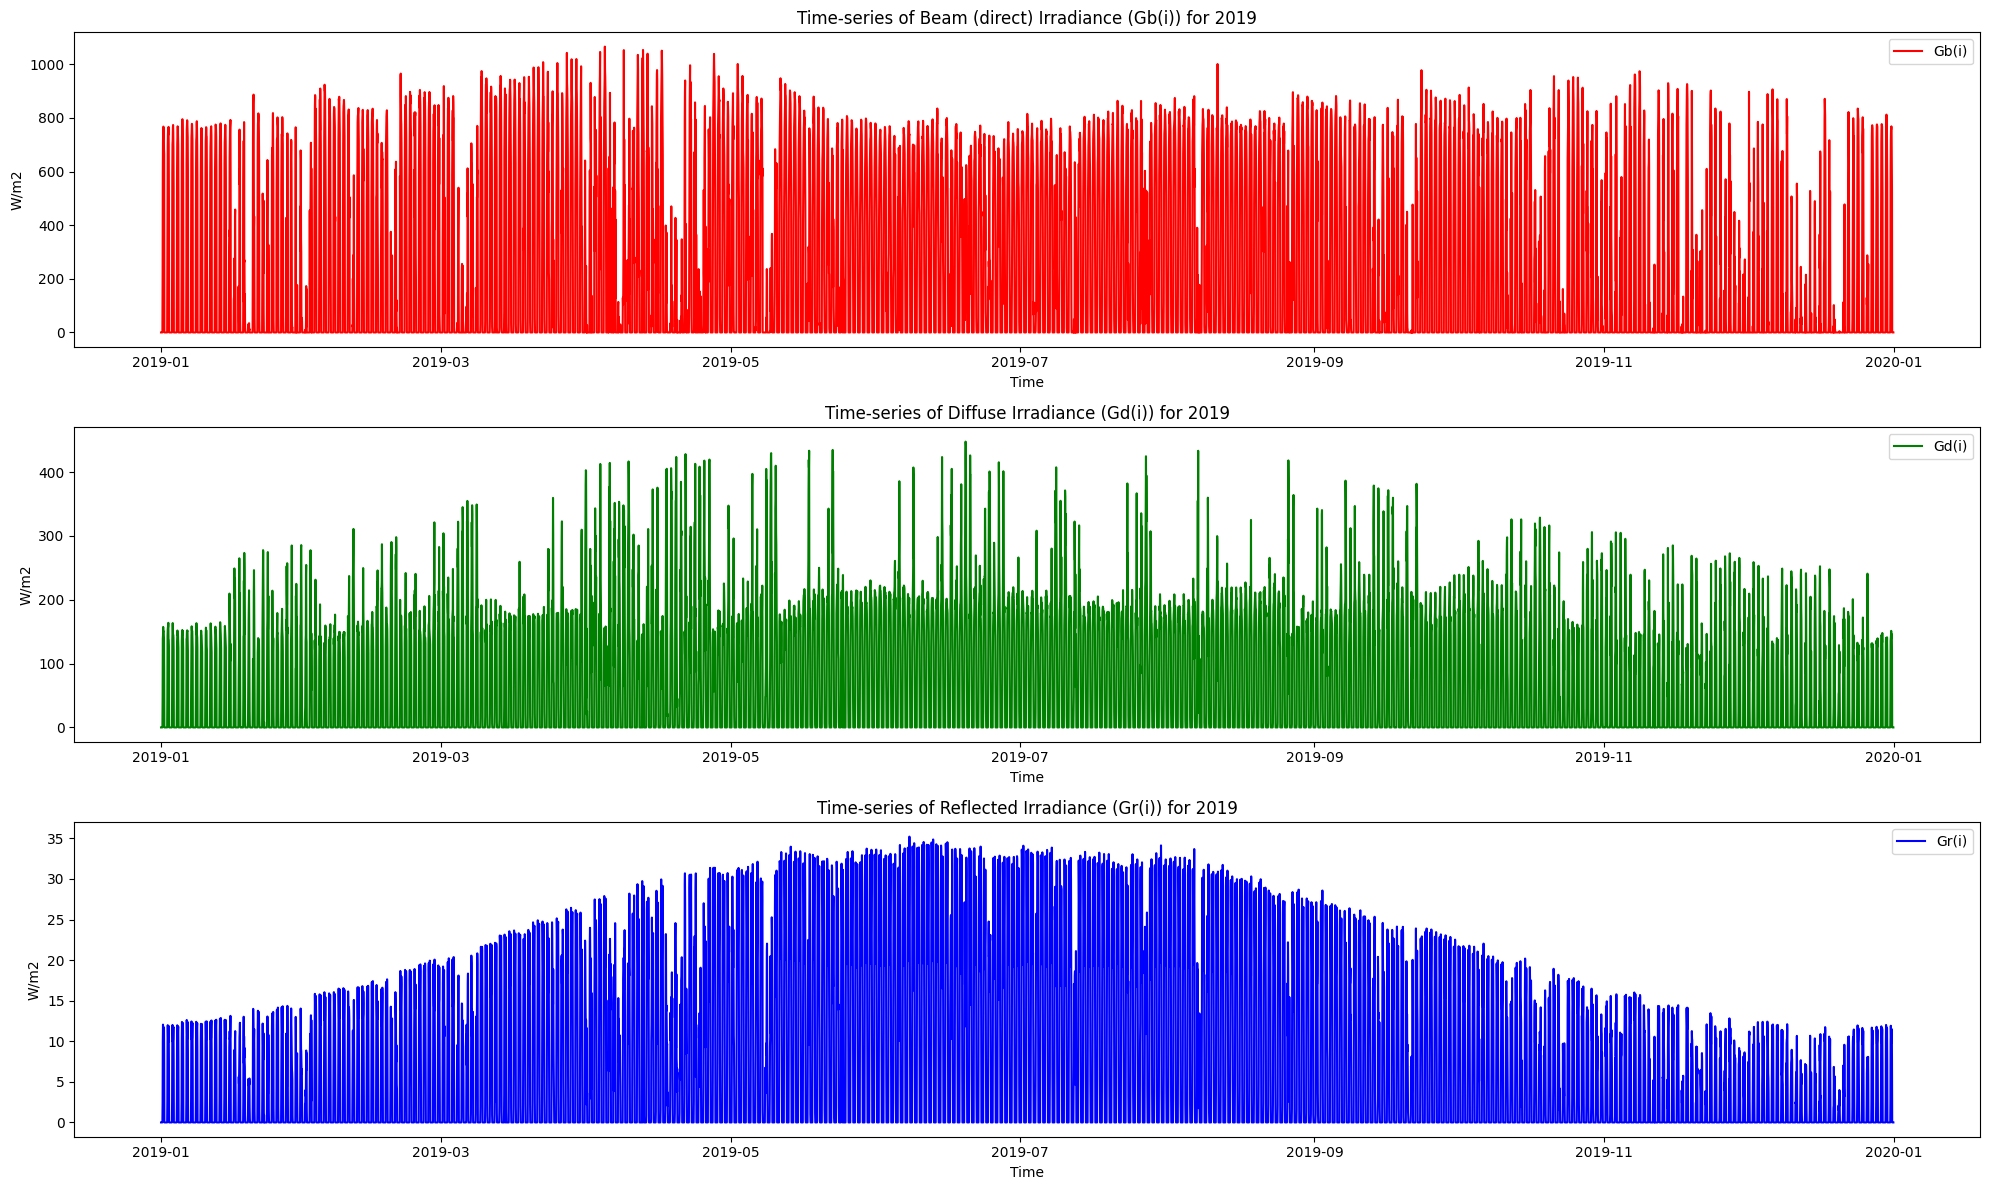

In [ ]:
import matplotlib.pyplot as plt

# Filter data for the year 2019 for visualization
df_2019 = df_filtered['2019']

# Plot time-series graphs for Gb(i), Gd(i), and Gr(i)
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(df_2019.index, df_2019['Gb(i)'], label='Gb(i)', color='r')
plt.title('Time-series of Beam (direct) Irradiance (Gb(i)) for 2019')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df_2019.index, df_2019['Gd(i)'], label='Gd(i)', color='g')
plt.title('Time-series of Diffuse Irradiance (Gd(i)) for 2019')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df_2019.index, df_2019['Gr(i)'], label='Gr(i)', color='b')
plt.title('Time-series of Reflected Irradiance (Gr(i)) for 2019')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

plt.tight_layout()
plt.show()

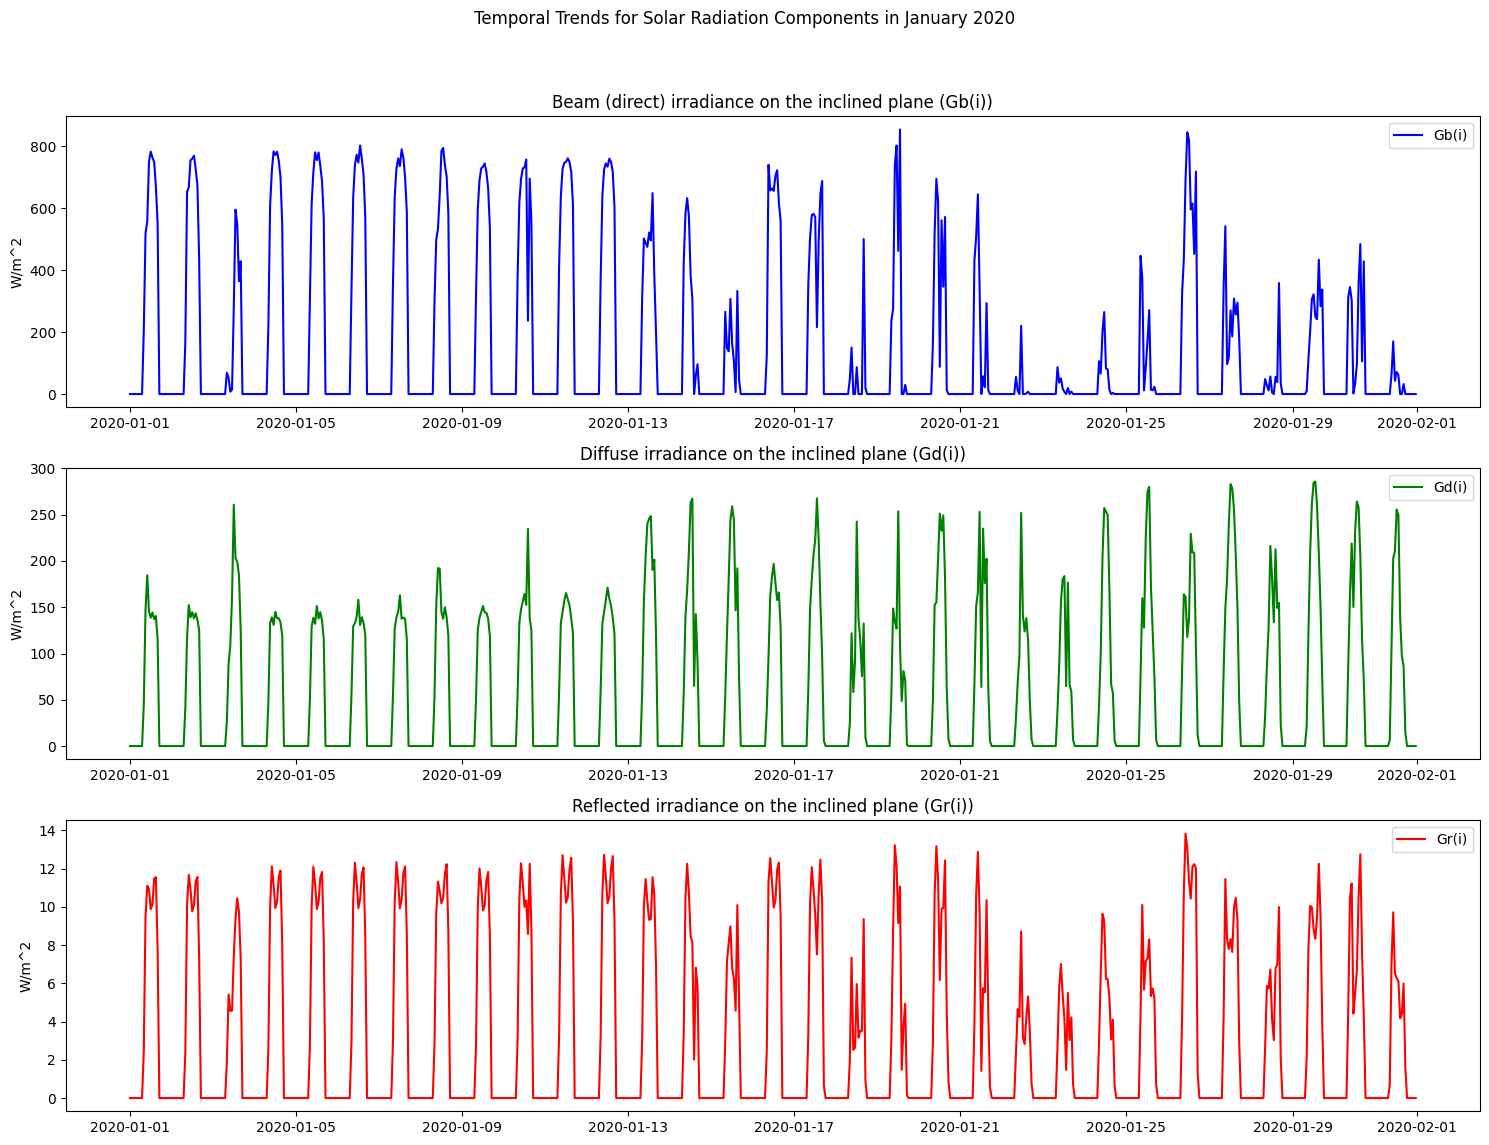

In [ ]:
import matplotlib.pyplot as plt

# Select a subset of data for better visibility in plots (e.g., one month of data)
subset_data = df_filtered['2020-01-01':'2020-01-31']

# Plotting Temporal Trends for solar radiation components
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Temporal Trends for Solar Radiation Components in January 2020')

# Gb(i)
axes[0].plot(subset_data.index, subset_data['Gb(i)'], label='Gb(i)', color='b')
axes[0].set_title('Beam (direct) irradiance on the inclined plane (Gb(i))')
axes[0].set_ylabel('W/m^2')
axes[0].legend()

# Gd(i)
axes[1].plot(subset_data.index, subset_data['Gd(i)'], label='Gd(i)', color='g')
axes[1].set_title('Diffuse irradiance on the inclined plane (Gd(i))')
axes[1].set_ylabel('W/m^2')
axes[1].legend()

# Gr(i)
axes[2].plot(subset_data.index, subset_data['Gr(i)'], label='Gr(i)', color='r')
axes[2].set_title('Reflected irradiance on the inclined plane (Gr(i))')
axes[2].set_ylabel('W/m^2')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observations:

  - Gb(i) (Beam Irradiance): You can observe clear cyclical patterns, indicative of daily cycles. The irradiance peaks during the day and drops to zero during the night.
  - Gd(i) (Diffuse Irradiance): Similar to Gb(i), Gd(i) also shows daily cycles but with smaller magnitudes.
  - Gr(i) (Reflected Irradiance): Gr(i) also exhibits daily cyclical patterns, similar to Gb(i) and Gd(i).

These visualizations confirm the presence of daily cycles and perhaps even seasonal patterns, although the latter would require a more in-depth analysis to confirm.

### Hourly/Daily/Monthly Profiles

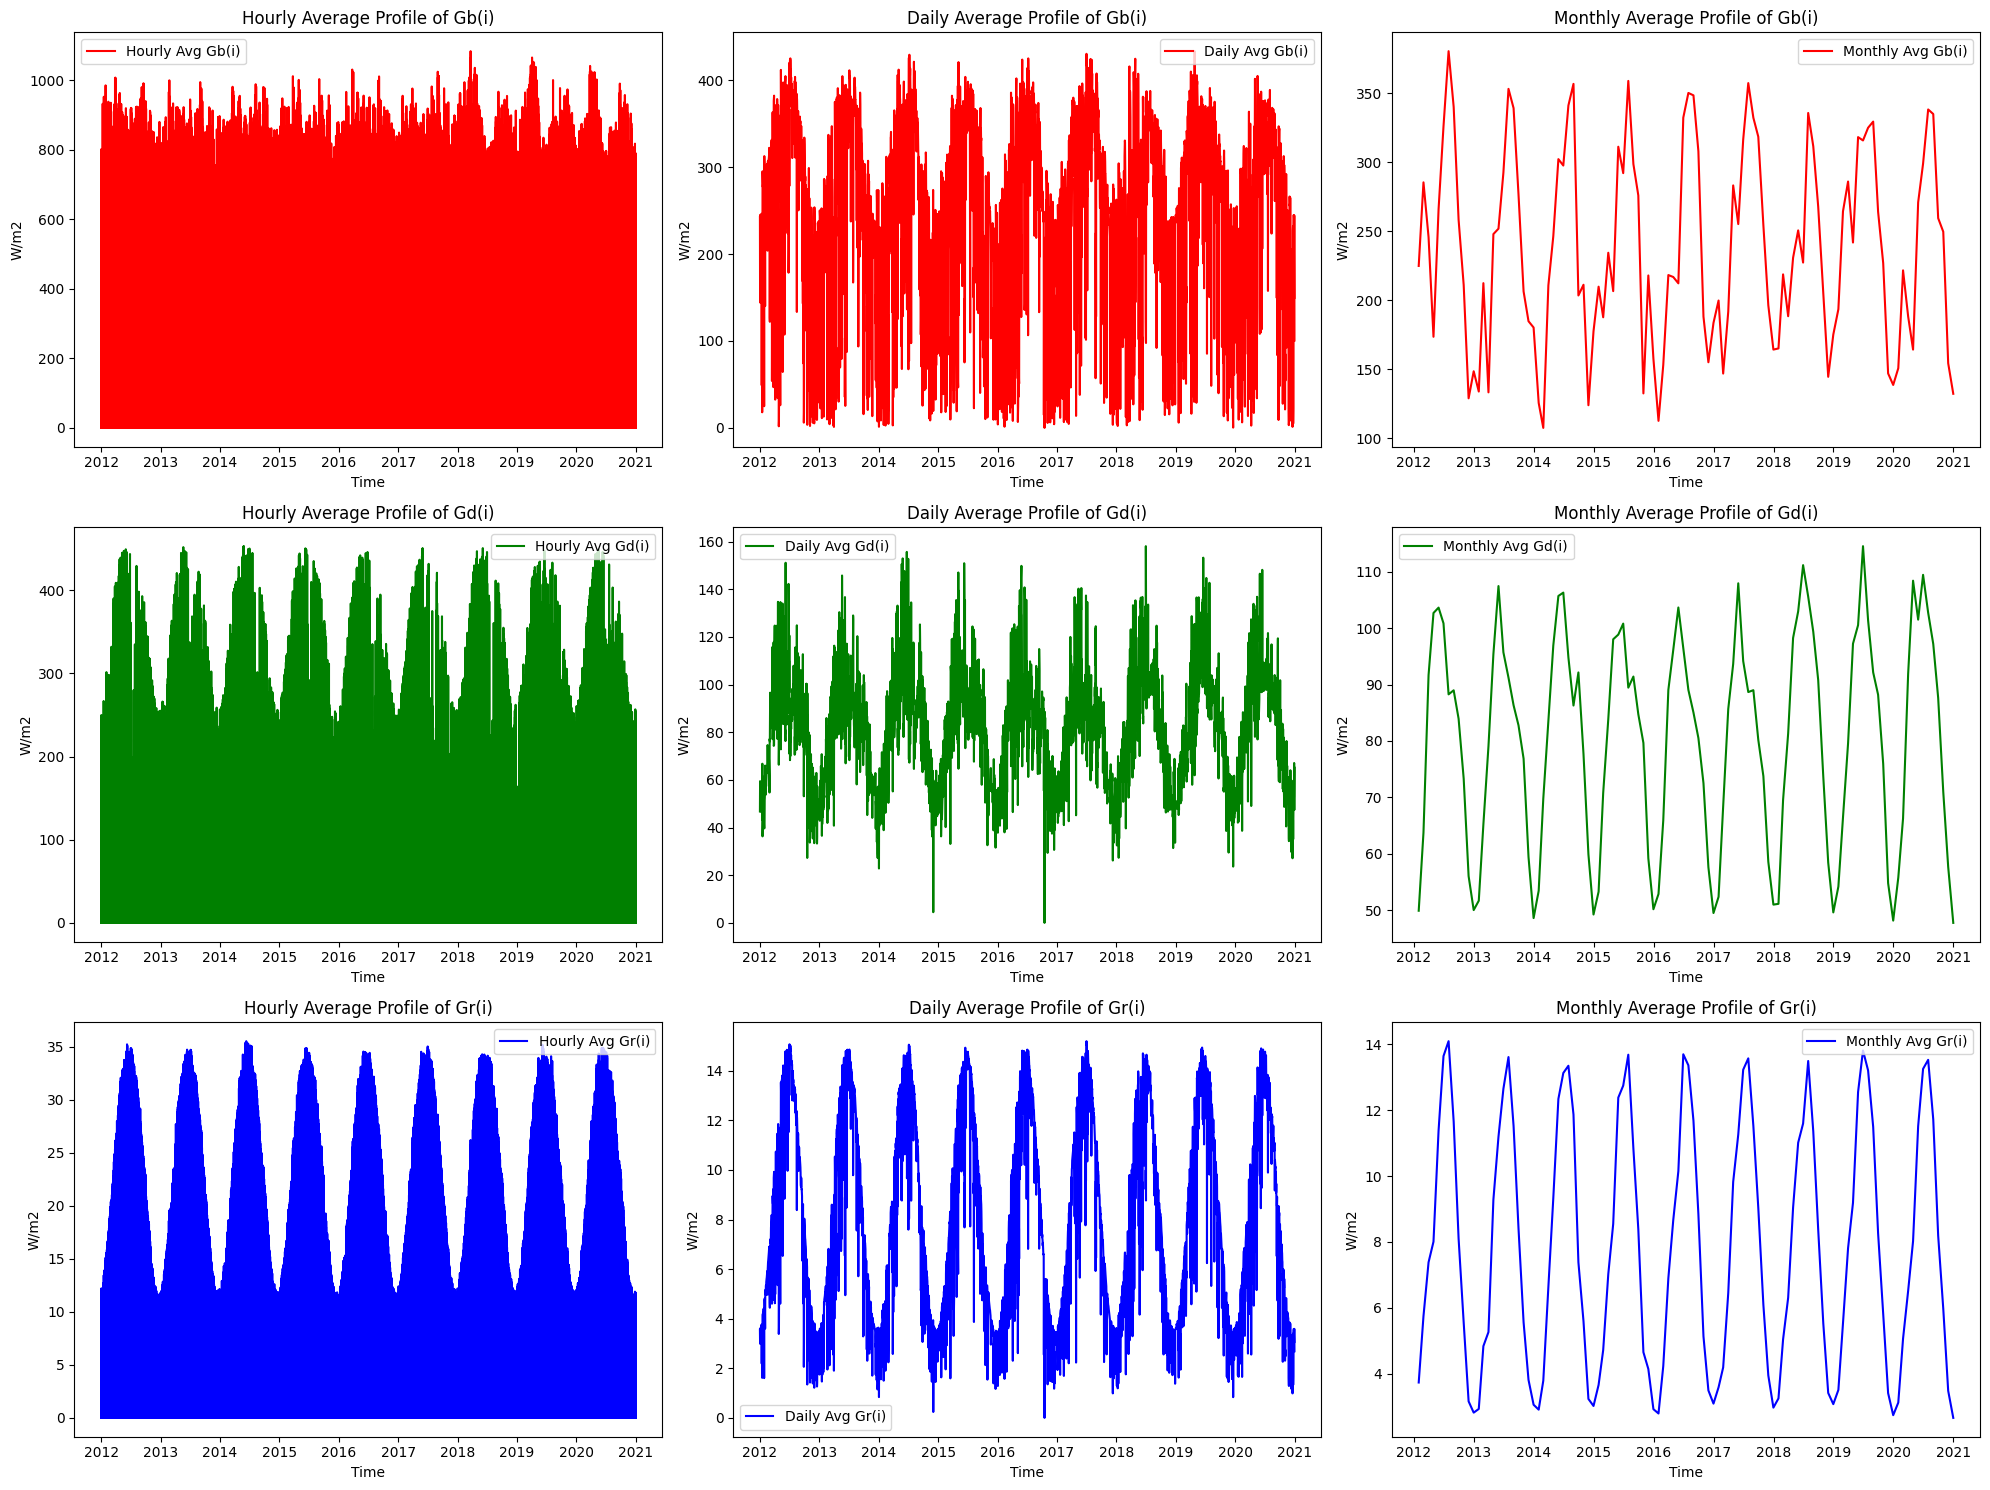

In [ ]:
# Aggregate data to different time resolutions for profiling
hourly_mean = df_filtered.resample('H').mean()
daily_mean = df_filtered.resample('D').mean()
monthly_mean = df_filtered.resample('M').mean()

# Plotting average profiles
plt.figure(figsize=(20, 15))

# Hourly Profile for Gb(i)
plt.subplot(3, 3, 1)
plt.plot(hourly_mean['Gb(i)'], label='Hourly Avg Gb(i)', color='r')
plt.title('Hourly Average Profile of Gb(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Daily Profile for Gb(i)
plt.subplot(3, 3, 2)
plt.plot(daily_mean['Gb(i)'], label='Daily Avg Gb(i)', color='r')
plt.title('Daily Average Profile of Gb(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Monthly Profile for Gb(i)
plt.subplot(3, 3, 3)
plt.plot(monthly_mean['Gb(i)'], label='Monthly Avg Gb(i)', color='r')
plt.title('Monthly Average Profile of Gb(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Hourly Profile for Gd(i)
plt.subplot(3, 3, 4)
plt.plot(hourly_mean['Gd(i)'], label='Hourly Avg Gd(i)', color='g')
plt.title('Hourly Average Profile of Gd(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Daily Profile for Gd(i)
plt.subplot(3, 3, 5)
plt.plot(daily_mean['Gd(i)'], label='Daily Avg Gd(i)', color='g')
plt.title('Daily Average Profile of Gd(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Monthly Profile for Gd(i)
plt.subplot(3, 3, 6)
plt.plot(monthly_mean['Gd(i)'], label='Monthly Avg Gd(i)', color='g')
plt.title('Monthly Average Profile of Gd(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Hourly Profile for Gr(i)
plt.subplot(3, 3, 7)
plt.plot(hourly_mean['Gr(i)'], label='Hourly Avg Gr(i)', color='b')
plt.title('Hourly Average Profile of Gr(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Daily Profile for Gr(i)
plt.subplot(3, 3, 8)
plt.plot(daily_mean['Gr(i)'], label='Daily Avg Gr(i)', color='b')
plt.title('Daily Average Profile of Gr(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

# Monthly Profile for Gr(i)
plt.subplot(3, 3, 9)
plt.plot(monthly_mean['Gr(i)'], label='Monthly Avg Gr(i)', color='b')
plt.title('Monthly Average Profile of Gr(i)')
plt.xlabel('Time')
plt.ylabel('W/m2')
plt.legend()

plt.tight_layout()
plt.show()

### Observations:

    Gb(i) (Beam Irradiance):
        The hourly and daily profiles exhibit clear cyclical patterns.
        The monthly profile suggests possible seasonal variations, with peaks occurring around mid-year.

    Gd(i) (Diffuse Irradiance):
        Similar to Gb(i), the hourly and daily profiles also show cyclical patterns.
        The monthly profile seems to be less variable compared to Gb(i), but still indicates potential seasonality.

    Gr(i) (Reflected Irradiance):
        Both the hourly and daily profiles show daily cycles.
        The monthly profile is relatively flat, suggesting less seasonal influence on Gr(i).

The profiles affirm the presence of daily cycles in all three irradiance types, and they suggest potential seasonal patterns, particularly for Gb(i) and Gd(i).

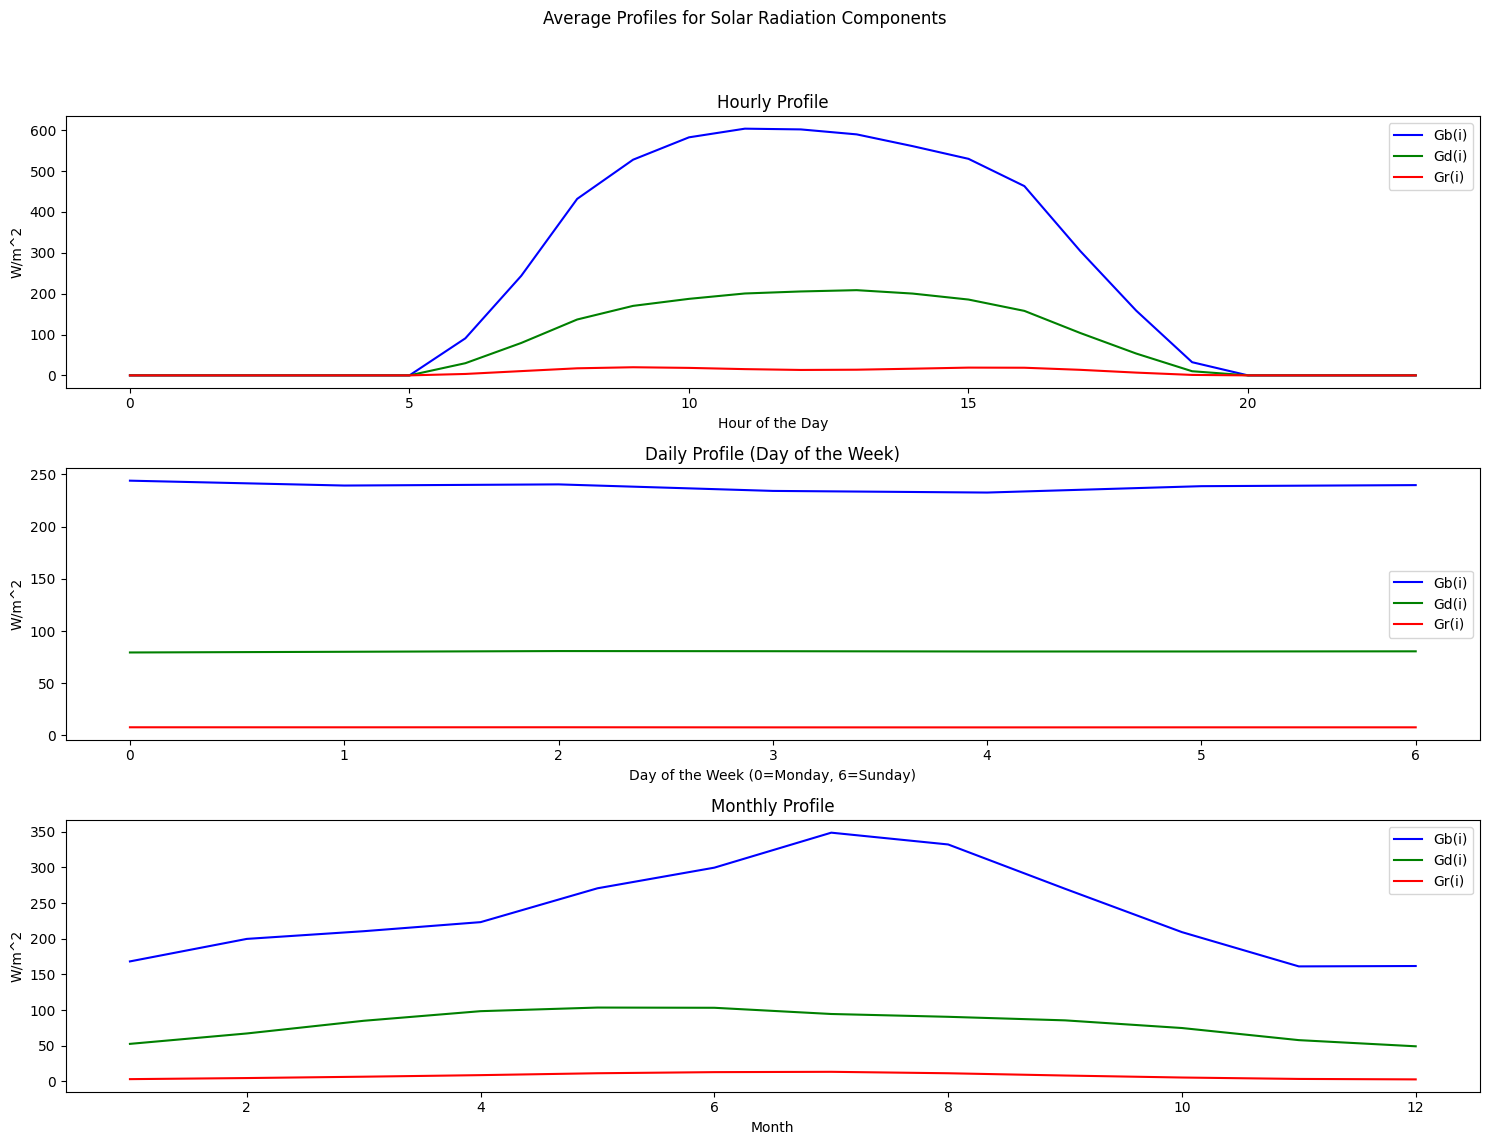

In [ ]:
# Hourly Profile
hourly_avg = df_filtered.groupby(df_filtered.index.hour).mean()

# Daily Profile (Day of the Week)
daily_avg = df_filtered.groupby(df_filtered.index.dayofweek).mean()

# Monthly Profile
monthly_avg = df_filtered.groupby(df_filtered.index.month).mean()

# Plotting the average profiles
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Average Profiles for Solar Radiation Components')

# Hourly Profile
axes[0].plot(hourly_avg.index, hourly_avg['Gb(i)'], label='Gb(i)', color='b')
axes[0].plot(hourly_avg.index, hourly_avg['Gd(i)'], label='Gd(i)', color='g')
axes[0].plot(hourly_avg.index, hourly_avg['Gr(i)'], label='Gr(i)', color='r')
axes[0].set_title('Hourly Profile')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('W/m^2')
axes[0].legend()

# Daily Profile
axes[1].plot(daily_avg.index, daily_avg['Gb(i)'], label='Gb(i)', color='b')
axes[1].plot(daily_avg.index, daily_avg['Gd(i)'], label='Gd(i)', color='g')
axes[1].plot(daily_avg.index, daily_avg['Gr(i)'], label='Gr(i)', color='r')
axes[1].set_title('Daily Profile (Day of the Week)')
axes[1].set_xlabel('Day of the Week (0=Monday, 6=Sunday)')
axes[1].set_ylabel('W/m^2')
axes[1].legend()

# Monthly Profile
axes[2].plot(monthly_avg.index, monthly_avg['Gb(i)'], label='Gb(i)', color='b')
axes[2].plot(monthly_avg.index, monthly_avg['Gd(i)'], label='Gd(i)', color='g')
axes[2].plot(monthly_avg.index, monthly_avg['Gr(i)'], label='Gr(i)', color='r')
axes[2].set_title('Monthly Profile')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('W/m^2')
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Aggregate data to quarter and year for average profiles:

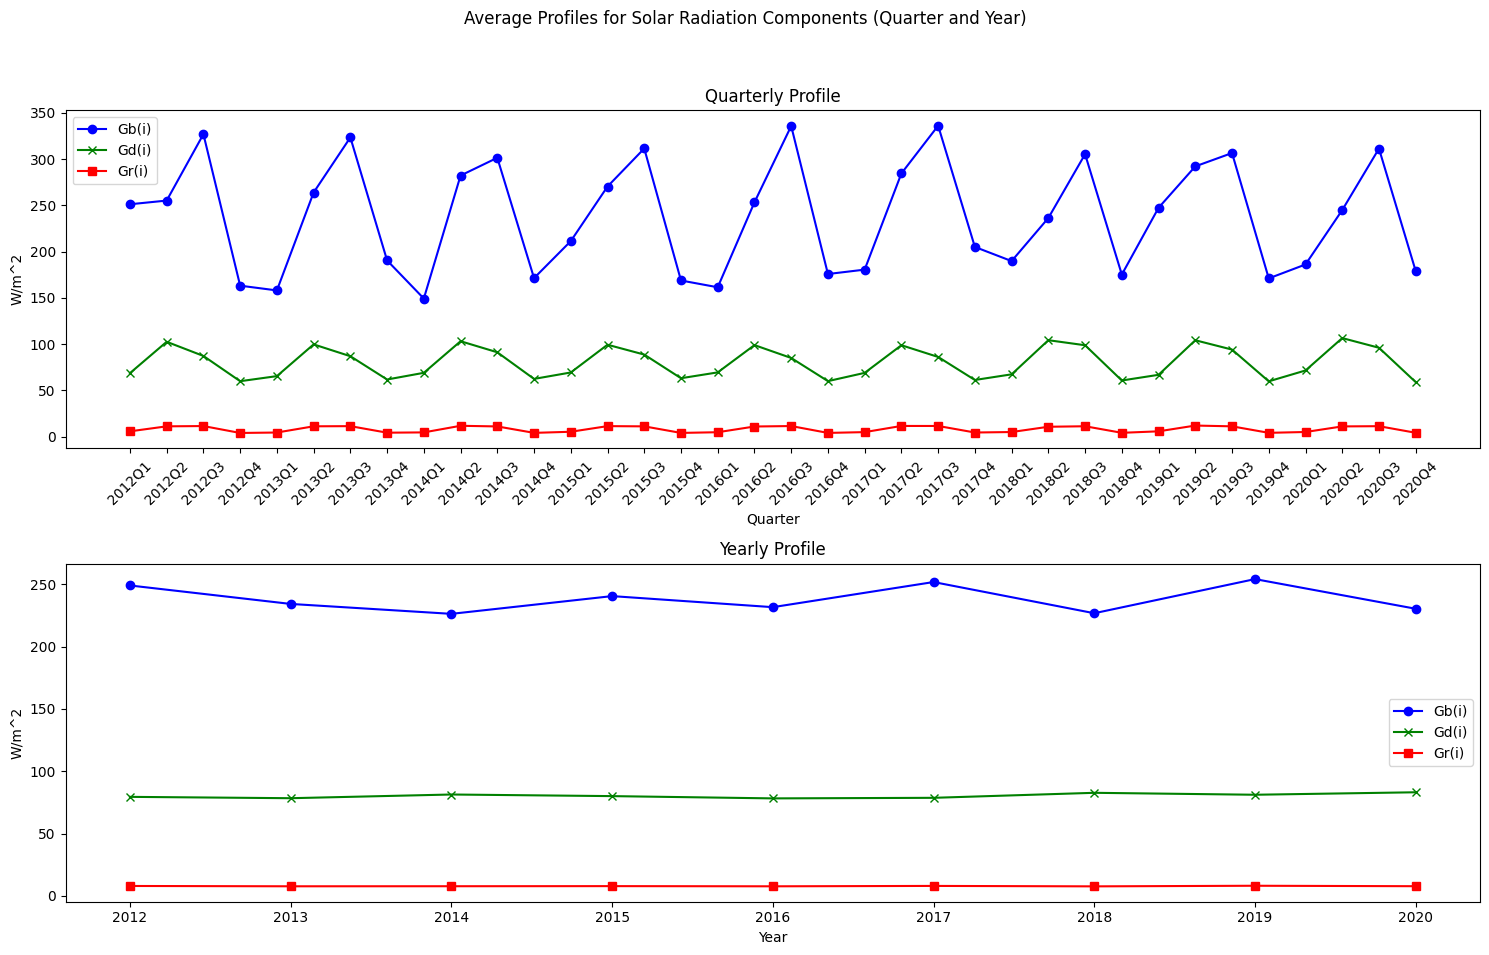

In [ ]:
# Quarterly Profile
quarterly_avg = df_filtered.groupby(df_filtered.index.to_period("Q")).mean()

# Yearly Profile
yearly_avg = df_filtered.groupby(df_filtered.index.year).mean()

# Plotting the average profiles for Quarter and Year
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Average Profiles for Solar Radiation Components (Quarter and Year)')

# Quarterly Profile
axes[0].plot(quarterly_avg.index.astype(str), quarterly_avg['Gb(i)'], label='Gb(i)', marker='o', color='b')
axes[0].plot(quarterly_avg.index.astype(str), quarterly_avg['Gd(i)'], label='Gd(i)', marker='x', color='g')
axes[0].plot(quarterly_avg.index.astype(str), quarterly_avg['Gr(i)'], label='Gr(i)', marker='s', color='r')
axes[0].set_title('Quarterly Profile')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('W/m^2')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Yearly Profile
axes[1].plot(yearly_avg.index, yearly_avg['Gb(i)'], label='Gb(i)', marker='o', color='b')
axes[1].plot(yearly_avg.index, yearly_avg['Gd(i)'], label='Gd(i)', marker='x', color='g')
axes[1].plot(yearly_avg.index, yearly_avg['Gr(i)'], label='Gr(i)', marker='s', color='r')
axes[1].set_title('Yearly Profile')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('W/m^2')
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Distribution Analysis

Histograms and Density Plots:

I'll start by generating histograms and density plots for the original features Gb(i), Gd(i), Gr(i), H_sun, T2m, and WS10m, as well as some of the engineered features.

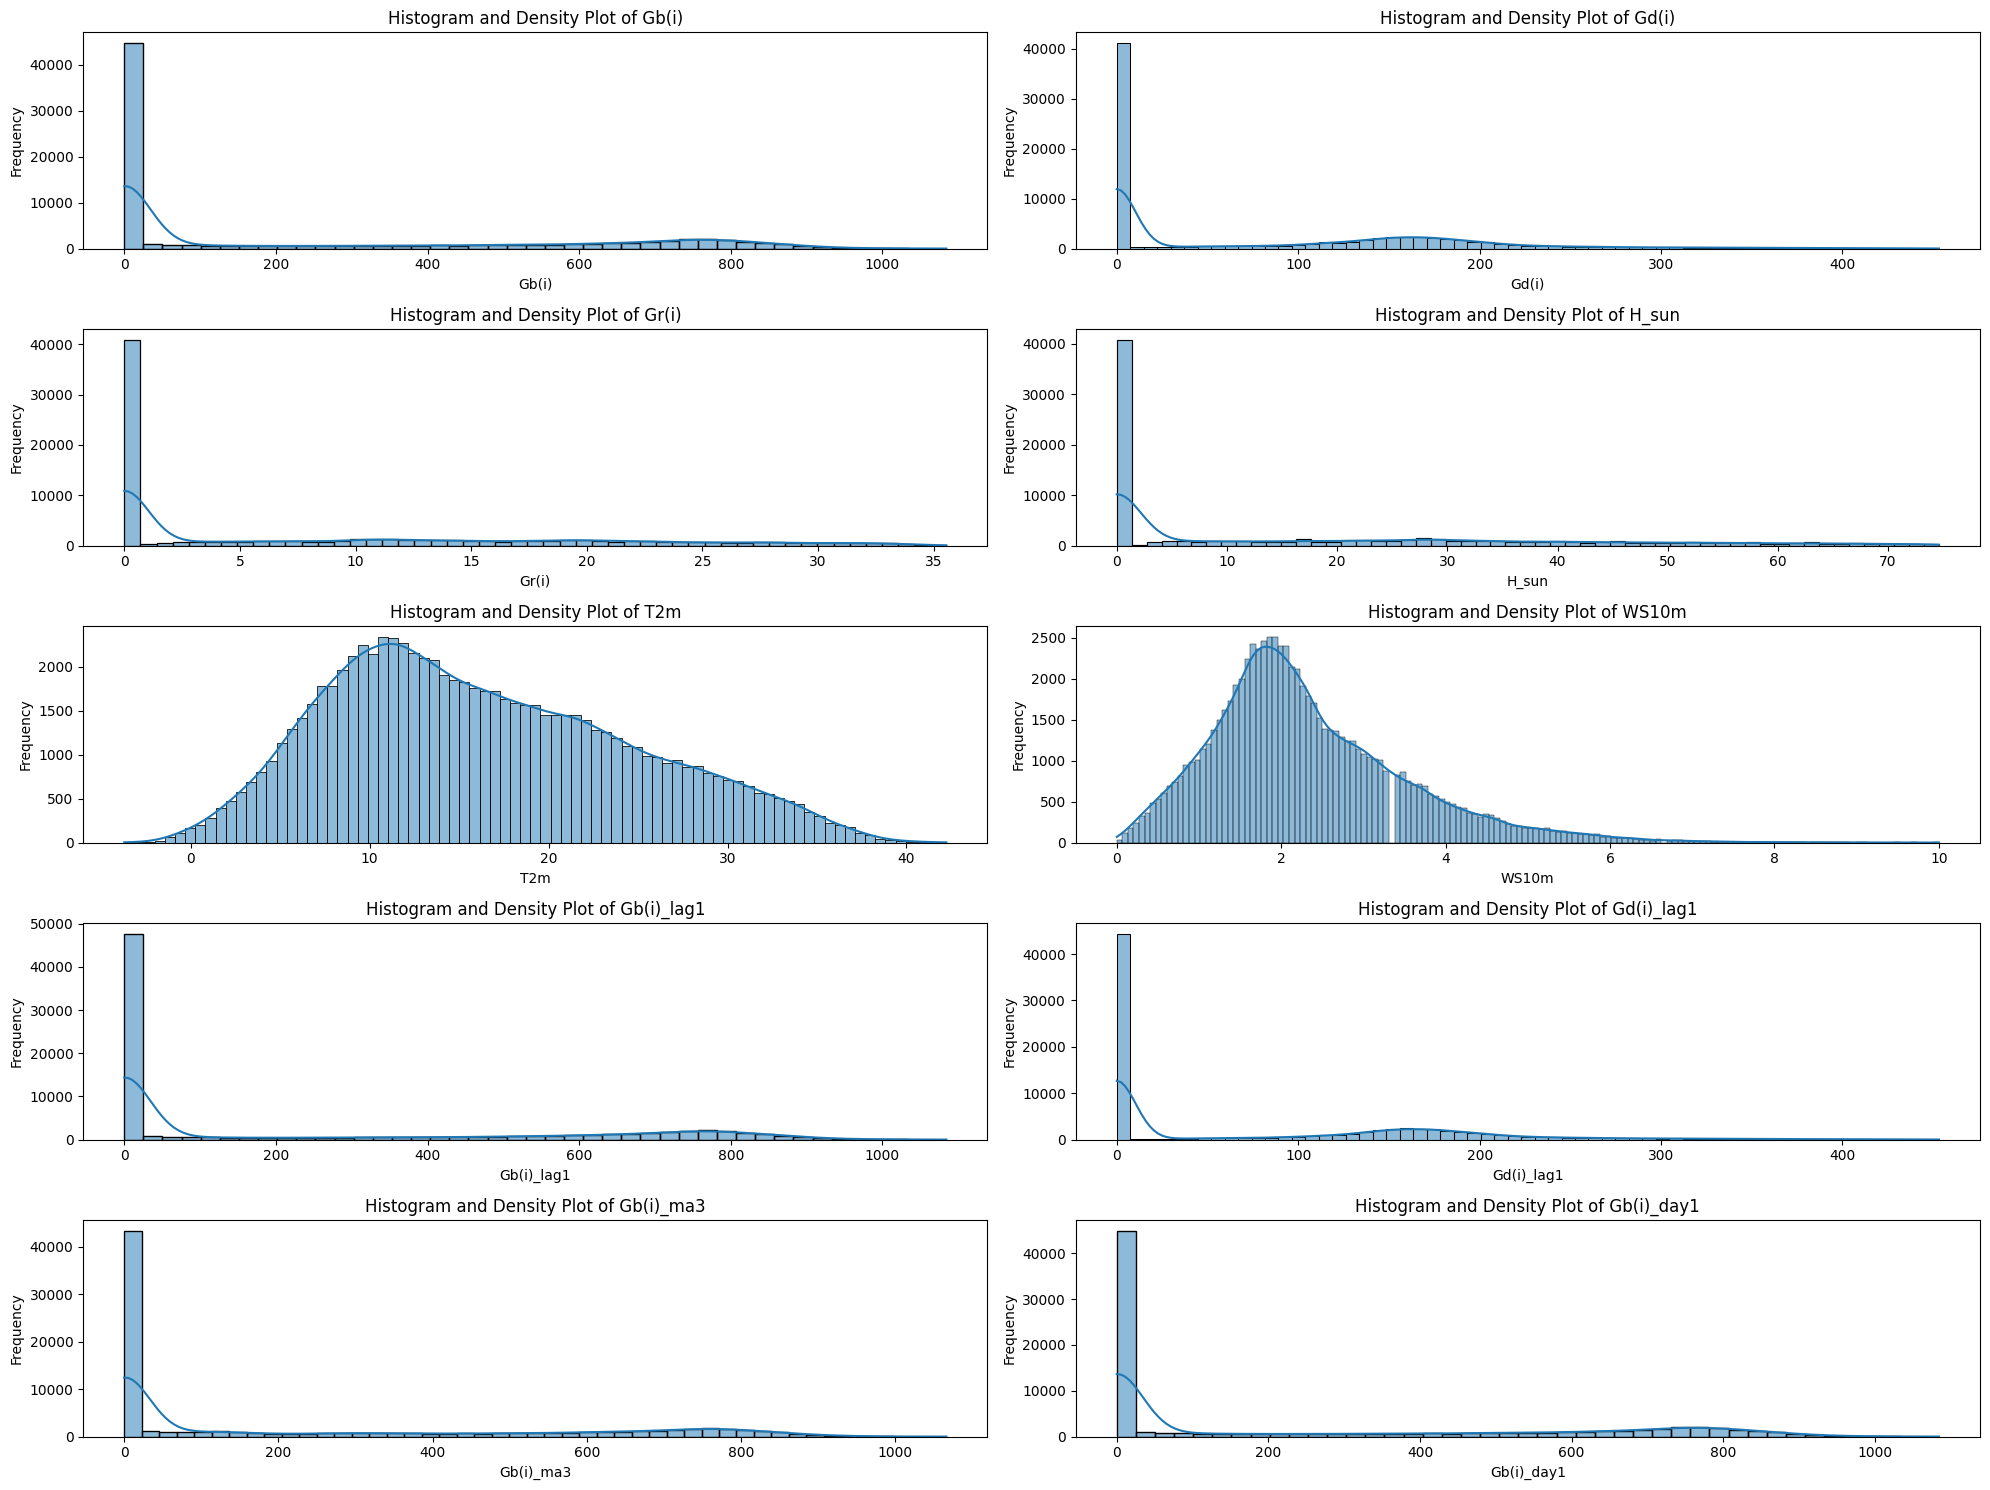

In [ ]:
import seaborn as sns

# Select a subset of columns for histogram and density plots
selected_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m', 'Gb(i)_lag1', 'Gd(i)_lag1', 'Gb(i)_ma3', 'Gb(i)_day1']

# histograms and density plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations:

Original Features:
  - Gb(i), Gd(i), and Gr(i) exhibit right-skewed distributions, with peaks close to zero. This is expected given that solar irradiance values are generally high during the day and zero at night.
  - H_sun shows also show right-skewed distributions, which is likely due to the sun rising and setting.
  - T2m (temperature) and WS10m (wind speed) appear to be approximately normally distributed.

Engineered Features:
  - Gb(i)_lag1 and Gd(i)_lag1 also show right-skewed distributions, similar to their original variables.
  - Gb(i)_ma3 shows a smoother right-skewed distribution, indicating that the moving average has smoothed out some of the fluctuations.
  - Gb(i)_day1 (historical values from the previous day) resembles its original distribution but with some smoothness.

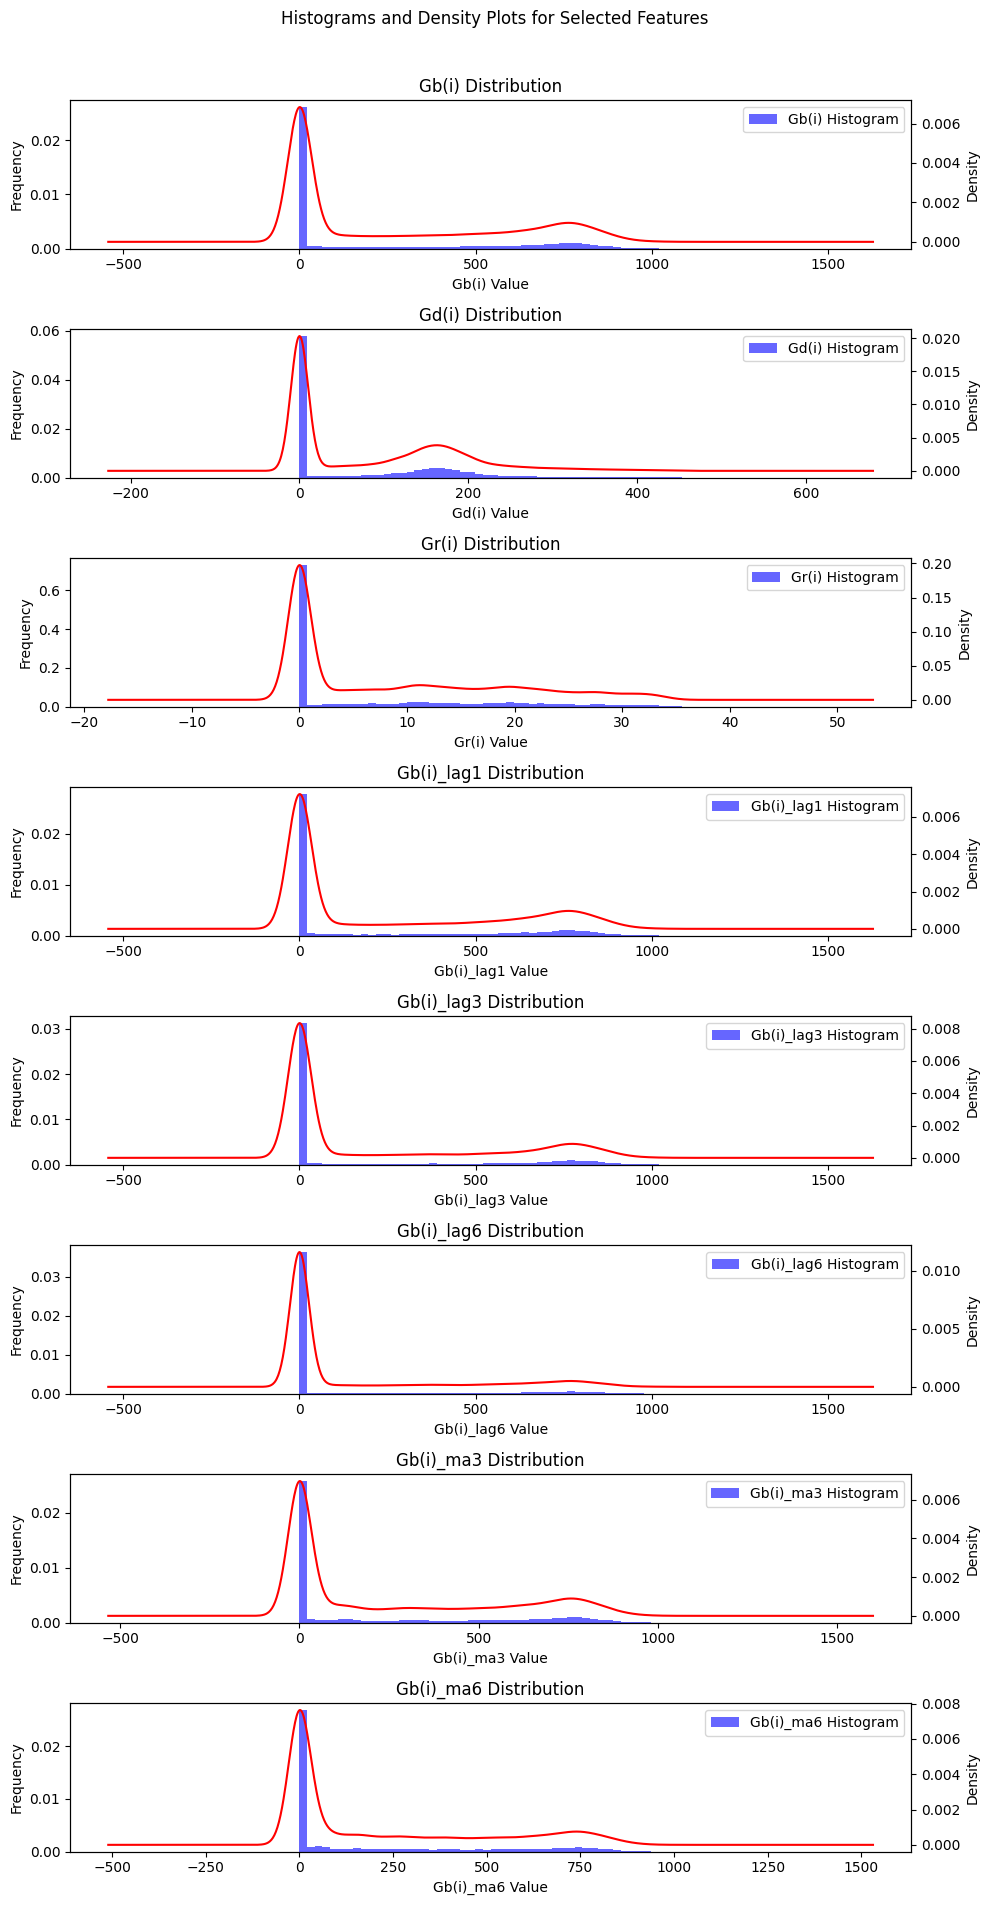

In [ ]:
# Plotting Histograms and Density Plots for selected features
selected_features = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'Gb(i)_lag1', 'Gb(i)_lag3', 'Gb(i)_lag6', 'Gb(i)_ma3', 'Gb(i)_ma6']

fig, axes = plt.subplots(len(selected_features), 1, figsize=(10, 20))
fig.suptitle('Histograms and Density Plots for Selected Features')

for i, feature in enumerate(selected_features):
    axes[i].hist(df_filtered[feature], bins=50, density=True, alpha=0.6, color='b', label=f'{feature} Histogram')
    df_filtered[feature].plot(kind='kde', ax=axes[i], secondary_y=True, color='r', label=f'{feature} Density')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(f'{feature} Value')
    axes[i].set_ylabel('Frequency')
    axes[i].right_ax.set_ylabel('Density')
    axes[i].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Box Plots

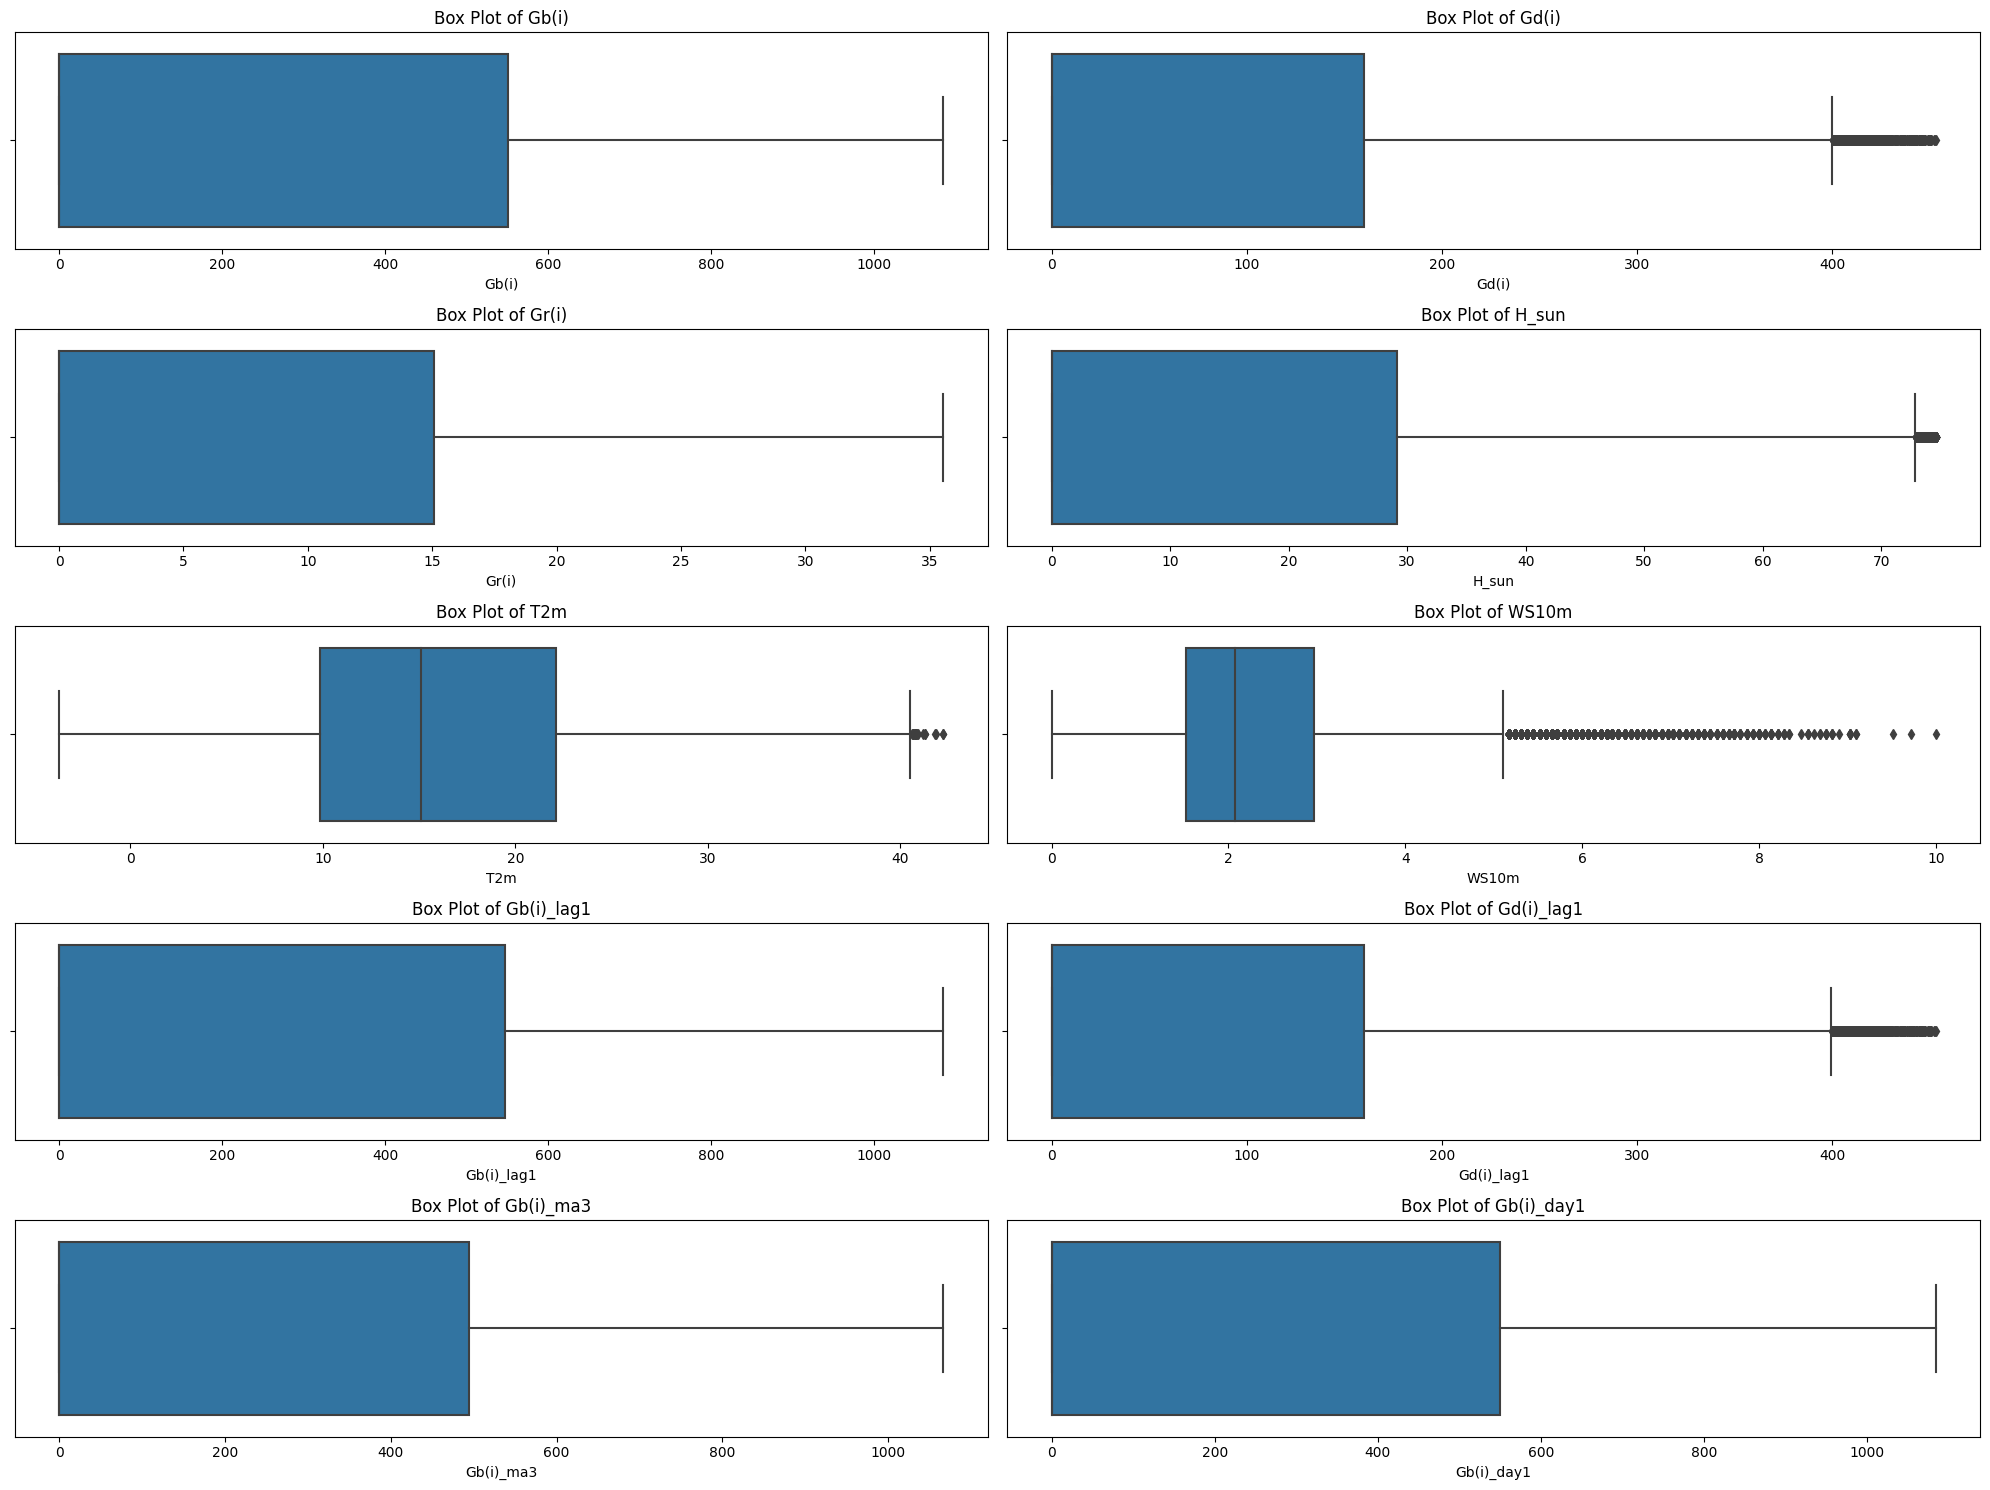

In [ ]:
# Box plots for selected columns to analyze spread and identify outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

###  Key observations:

    Original Features:
        Gb(i), Gd(i), and Gr(i) have a lot of data points close to zero, indicated by the boxes being skewed towards the lower end. Outliers are present on the higher end.
        H_sun bimodal distribution.
        T2m and WS10m have relatively symmetrical boxes, indicating a more balanced distribution.
    Engineered Features:
        Gb(i)_lag1 and Gd(i)_lag1 show similar characteristics to their original features, including outliers on the higher end.
        Gb(i)_ma3 has a slightly wider box, indicating a more even spread due to the smoothing effect of the moving average.
        Gb(i)_day1 shows a distribution similar to Gb(i).

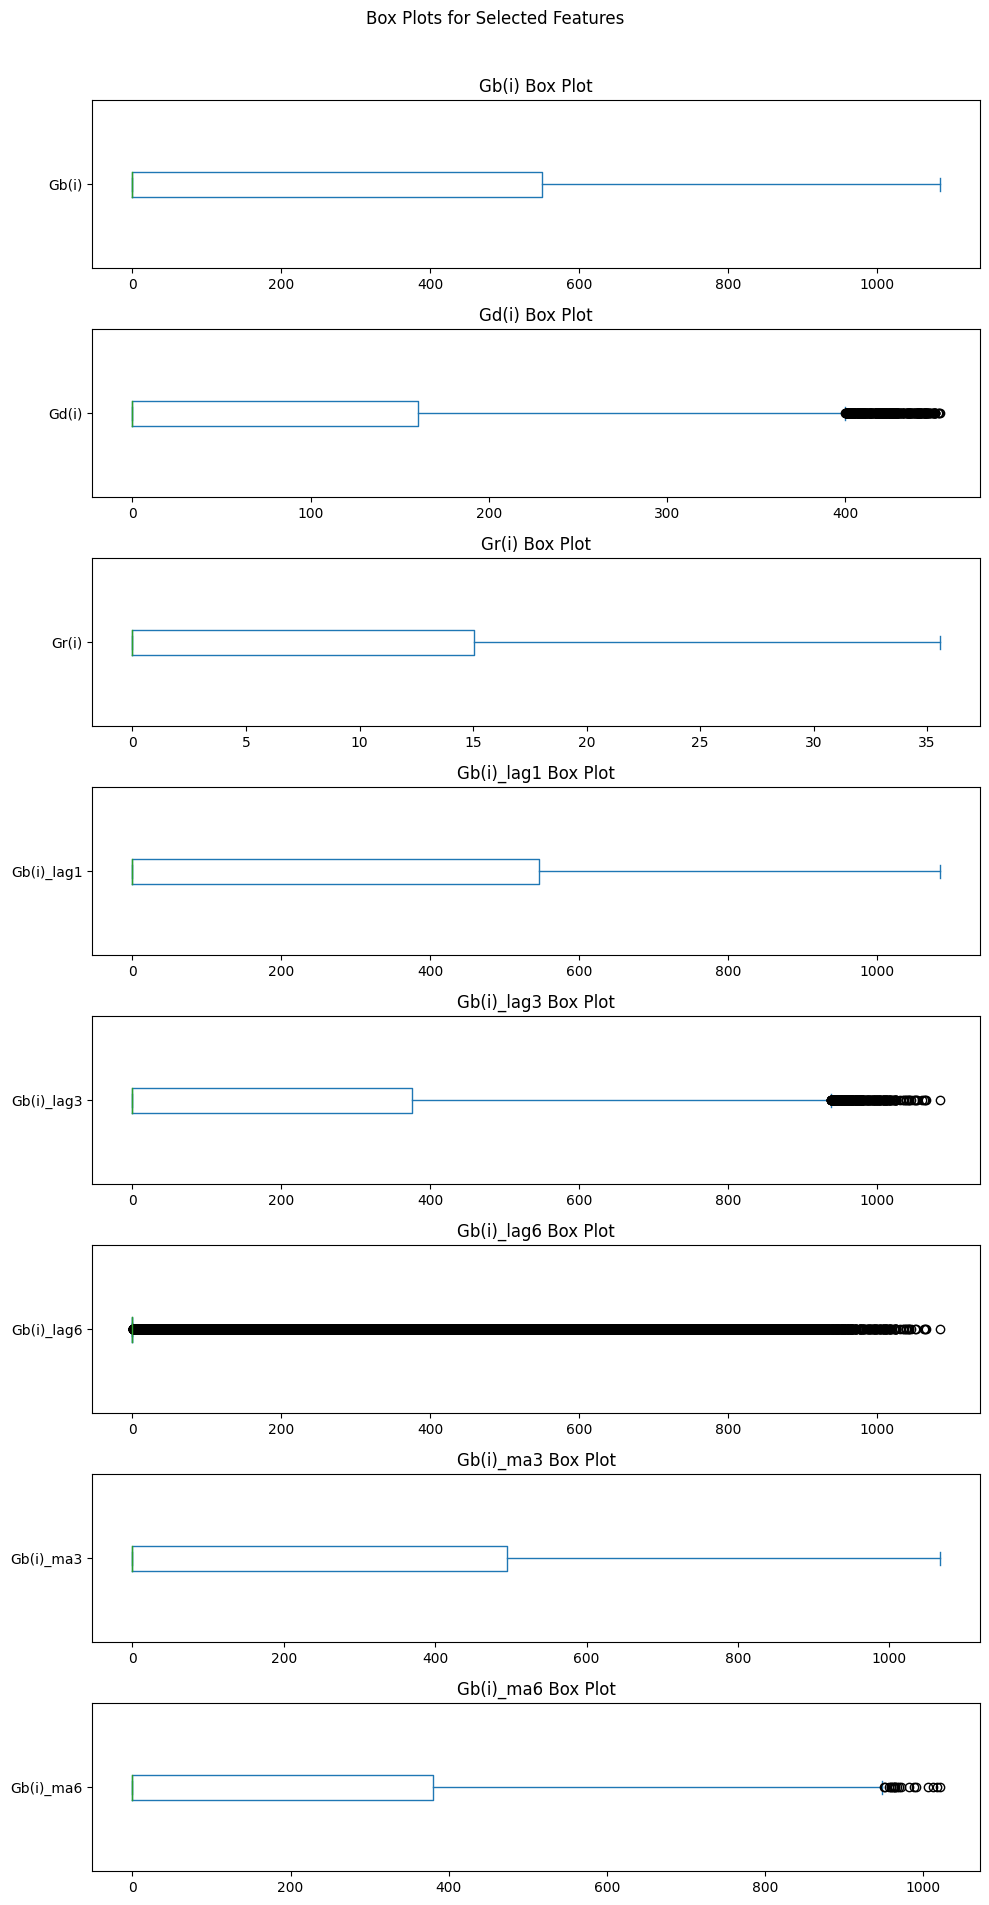

In [ ]:
# Plotting Box Plots for selected features
fig, axes = plt.subplots(len(selected_features), 1, figsize=(10, 20))
fig.suptitle('Box Plots for Selected Features')

for i, feature in enumerate(selected_features):
    df_filtered[feature].plot(kind='box', ax=axes[i], vert=False)
    axes[i].set_title(f'{feature} Box Plot')
    axes[i].set_yticklabels([feature])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

## Correlation Analysis

### Heatmap

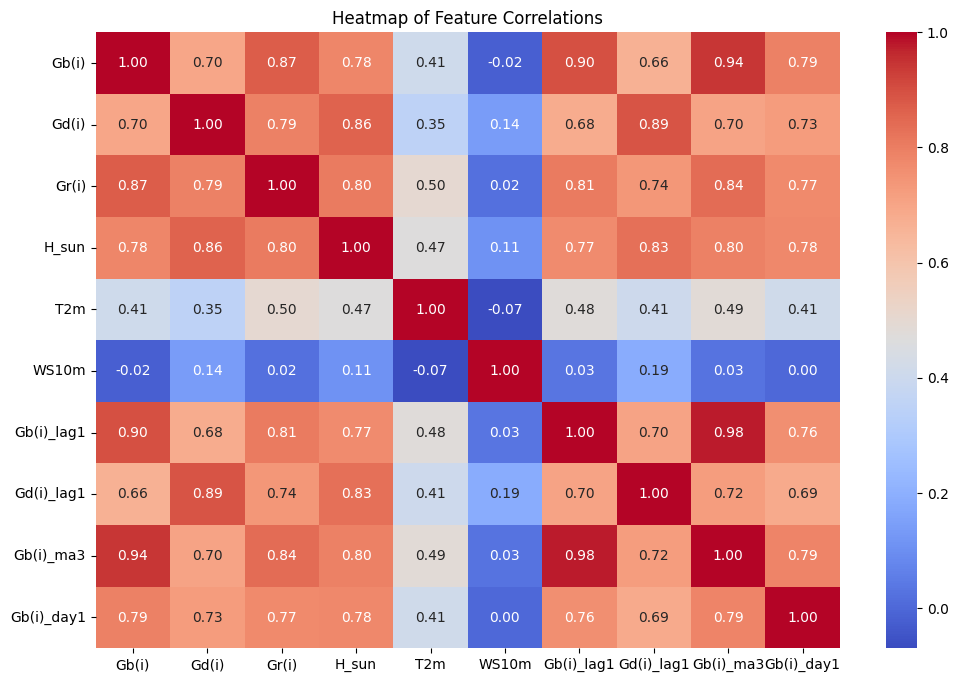

In [ ]:
# Select a subset of columns for correlation analysis
correlation_columns = ['Gb(i)', 'Gd(i)', 'Gr(i)', 'H_sun', 'T2m', 'WS10m', 'Gb(i)_lag1', 'Gd(i)_lag1', 'Gb(i)_ma3', 'Gb(i)_day1']

# Compute the correlation matrix
correlation_matrix = df_filtered[correlation_columns].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

### Key observations:

    Original Features:
        Gb(i), Gd(i), and Gr(i) are highly correlated with H_sun, which is expected as solar irradiance is largely dependent on the sun's position.
        Temperature (T2m) has moderate positive correlations with the irradiance features.
        Wind speed (WS10m) has low correlations with most other features.

    Engineered Features:
        Gb(i)_lag1 and Gd(i)_lag1 are highly correlated with their original variables (Gb(i) and Gd(i)), as they are lagged versions of these features.
        Gb(i)_ma3 also shows a high correlation with Gb(i), indicating that the moving average retains much of the original feature's characteristics.
        Gb(i)_day1 has a high correlation with Gb(i), confirming the relevance of historical data.

### Pair Plots

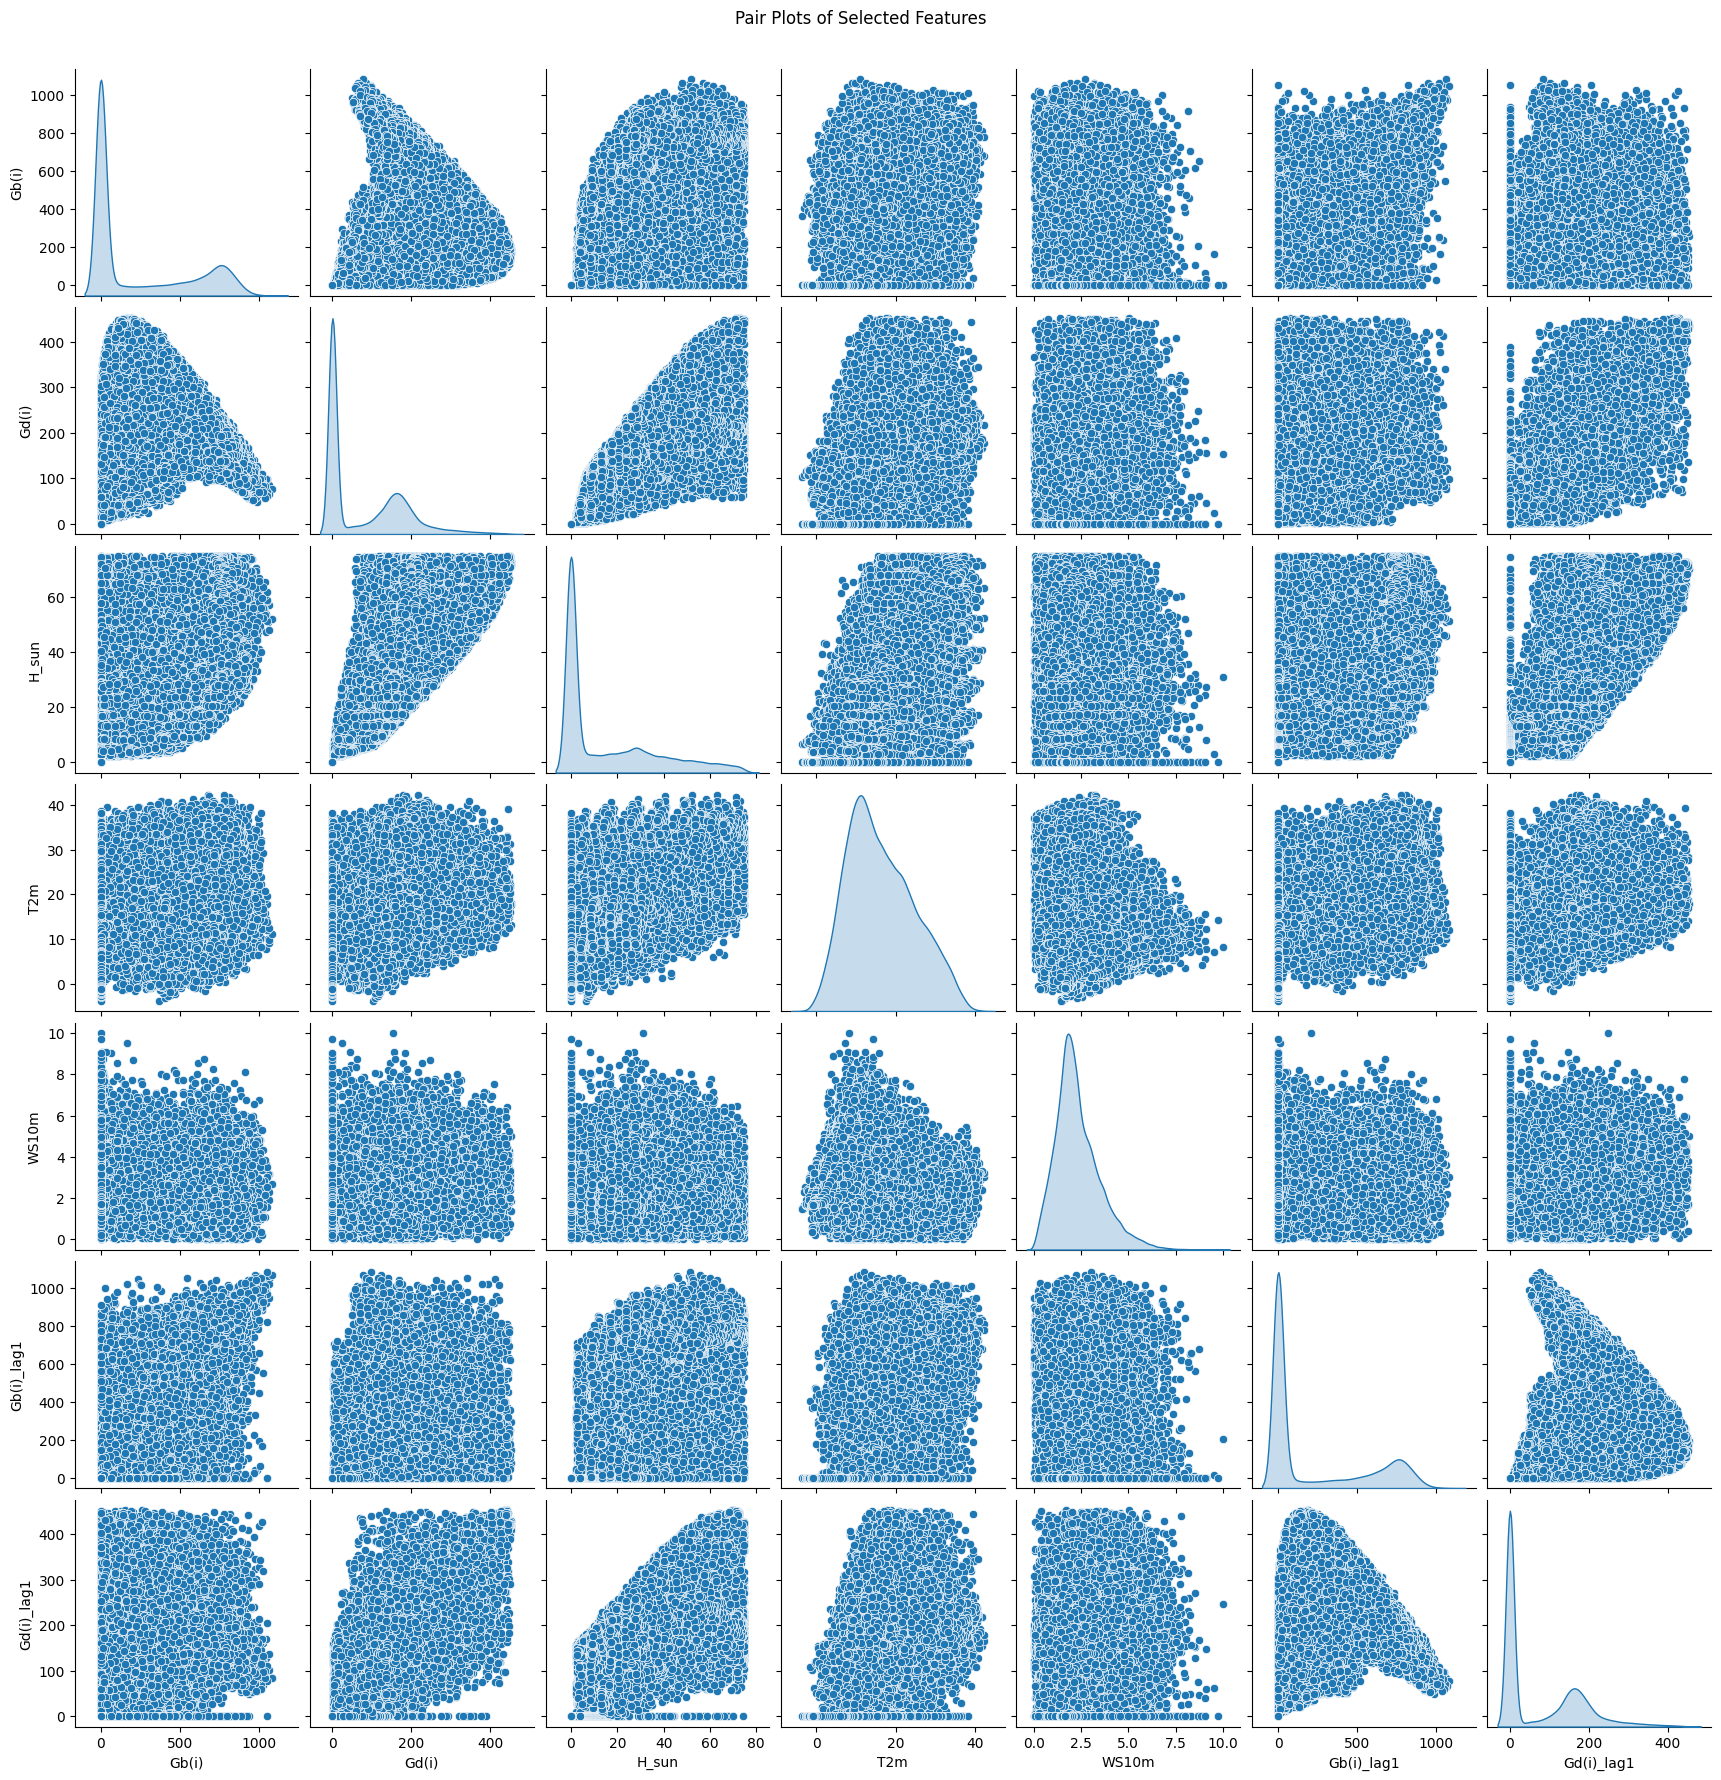

In [ ]:
# Select a subset of columns for pair plots
pairplot_columns = ['Gb(i)', 'Gd(i)', 'H_sun', 'T2m', 'WS10m', 'Gb(i)_lag1', 'Gd(i)_lag1']

# Generate pair plots for selected features
sns.pairplot(df_filtered[pairplot_columns], diag_kind='kde')
plt.suptitle('Pair Plots of Selected Features', y=1.02)
plt.show()

## Statistical Tests

In [ ]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import normaltest

# Initialize a dictionary to store test results
stat_test_results = {}

# Augmented Dickey-Fuller Test for Stationarity
# I'll test stationarity for a few selected features: 'Gb(i)', 'Gd(i)', 'Gr(i)'
adf_results = {}
for feature in ['Gb(i)', 'Gd(i)', 'Gr(i)']:
        #... continue

# Normality Tests
# I'll use the D'Agostino and Pearson's test which is available via the `normaltest` function in scipy
normality_results = {}
for feature in ['Gb(i)', 'Gd(i)', 'Gr(i)']:
        #... continue

stat_test_results

{'ADF': {'Gb(i)': {'ADF Statistic': -20.21935830051433,
   'p-value': 0.0,
   'Critical Values': {'1%': -3.430432939273607,
    '5%': -2.861576657751156,
    '10%': -2.566789511657082}},
  'Gd(i)': {'ADF Statistic': -14.426780106129256,
   'p-value': 7.748414725415611e-27,
   'Critical Values': {'1%': -3.430432929807266,
    '5%': -2.8615766535672527,
    '10%': -2.5667895094301243}},
  'Gr(i)': {'ADF Statistic': -8.216196794898924,
   'p-value': 6.61415811064123e-13,
   'Critical Values': {'1%': -3.430432939273607,
    '5%': -2.861576657751156,
    '10%': -2.566789511657082}}},
 'Normality': {'Gb(i)': {'Statistic': 22091.930912852113, 'p-value': 0.0},
  'Gd(i)': {'Statistic': 8422.724445336105, 'p-value': 0.0},
  'Gr(i)': {'Statistic': 9743.293543426586, 'p-value': 0.0}}}

### Augmented Dickey-Fuller (ADF) Test for Stationarity

1. **Gb(i)**:
    - ADF Statistic: -20.22
    - p-value: 0.0
    - The ADF statistic is far less than the critical values at all confidence levels (1%, 5%, and 10%), and the p-value is zero. This strongly suggests that the series is stationary.

2. **Gd(i)**:
    - ADF Statistic: -14.43
    - p-value: \(7.75 \times 10^{-27}\)
    - Similar to `Gb(i)`, the ADF statistic is far less than the critical values, and the p-value is practically zero. The series appears to be stationary.

3. **Gr(i)**:
    - ADF Statistic: -8.22
    - p-value: \(6.61 \times 10^{-13}\)
    - Although the ADF statistic is smaller in magnitude compared to `Gb(i)` and `Gd(i)`, it is still less than the critical values, and the p-value is extremely low. The series is likely stationary.

### D'Agostino and Pearson's Test for Normality

1. **Gb(i)**, **Gd(i)**, **Gr(i)**:
    - Statistics: 22091.93, 8422.72, 9743.29 respectively
    - p-value: 0.0 for all
    - The extremely high statistics and zero p-values strongly indicate that these distributions are not normal.

#### Summary

- All three irradiance features (`Gb(i)`, `Gd(i)`, and `Gr(i)`) are stationary, which is advantageous for time-series modeling.
- None of the features follow a normal distribution, which is important to know when selecting or configuring statistical models that assume normally distributed residuals.

## Specialized Time-Series Techniques

### Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:

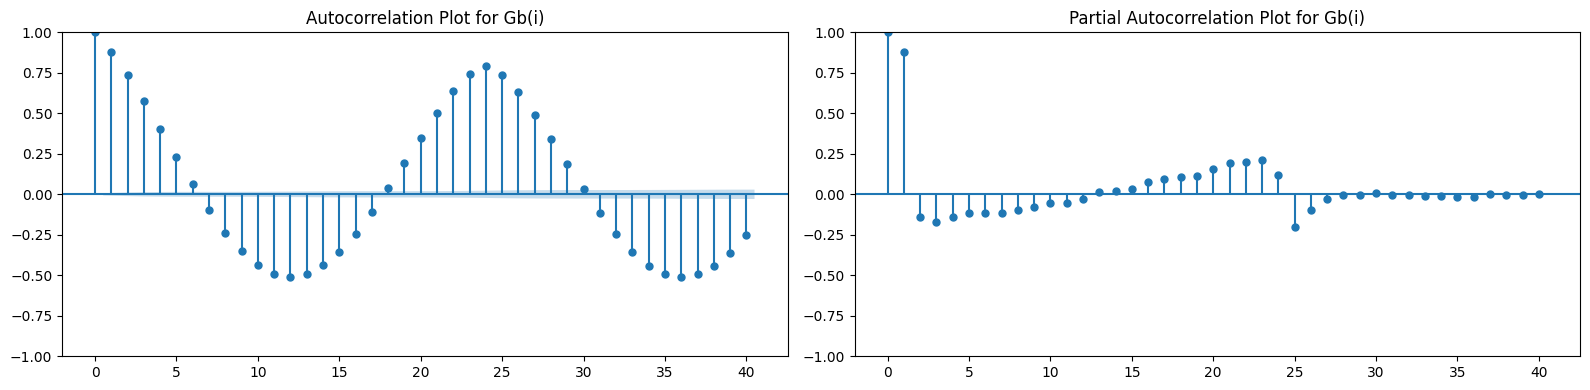

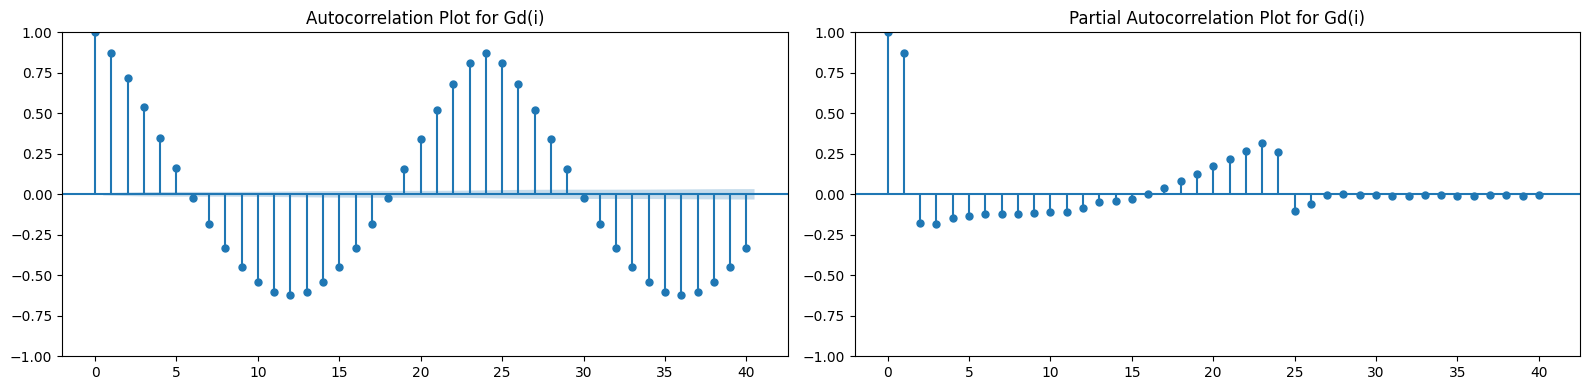

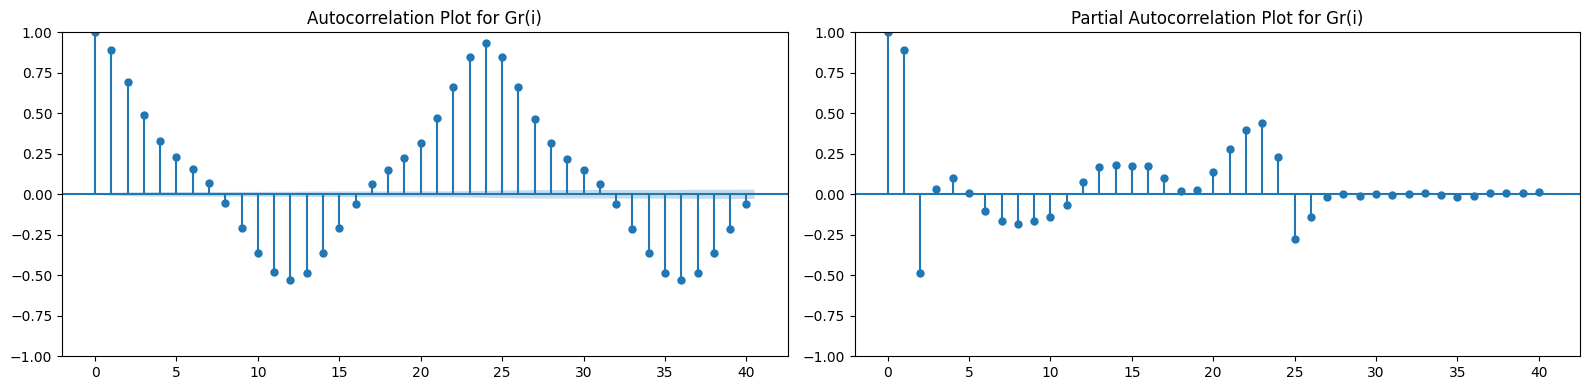

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Selected features for autocorrelation and partial autocorrelation analysis
acf_pacf_features = ['Gb(i)', 'Gd(i)', 'Gr(i)']

# Generate plots
for feature in #... continue

    # Autocorrelation Plot
    plot_acf #df_filtered... continue

    # Partial Autocorrelation Plot
    plot_pacf#df_filtered... continue

    plt.tight_layout()
    plt.show()

### Key observations:

    Gb(i) (Beam Irradiance):
        The ACF plot shows significant autocorrelations up to lag 1, then some minor peaks at later lags, suggesting that the current value is most strongly related to its immediate past value.
        The PACF plot shows a significant spike at lag 1, confirming the immediate past value's strong influence.

    Gd(i) (Diffuse Irradiance):
        The ACF plot is similar to that of Gb(i), with significant autocorrelations at lag 1.
        The PACF plot also shows a significant spike at lag 1, indicating strong correlation with the immediate past value.

    Gr(i) (Reflected Irradiance):
        The ACF plot shows a notable peak at lag 1, with minor peaks at later lags.
        The PACF plot also confirms the influence of the immediate past value with a significant spike at lag 1.

The ACF and PACF plots suggest that lag 1 is particularly important for all three irradiance features, which validates the choice of lagged features in the feature engineering step.

## Spectral analysis

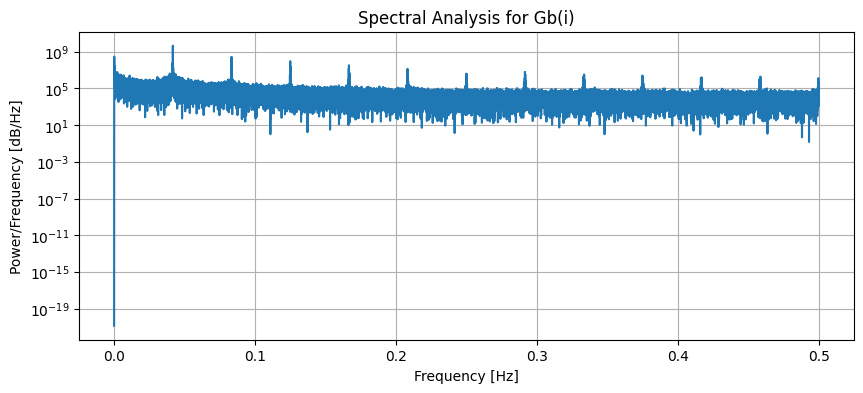

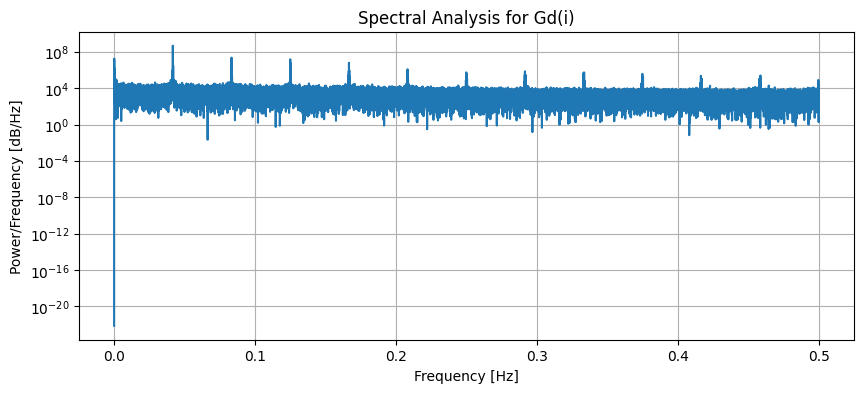

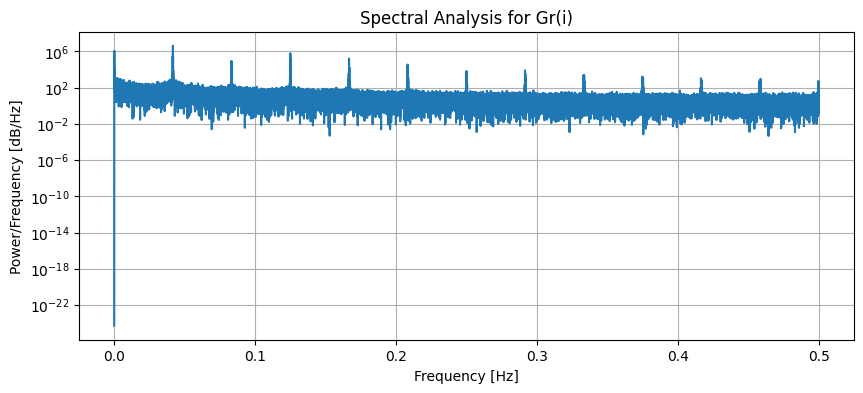

In [ ]:
from scipy.signal import periodogram

# Initialize a dictionary to store spectral analysis results
spectral_results = {}

# Perform Spectral Analysis for selected features: 'Gb(i)', 'Gd(i)', 'Gr(i)'
for feature in ['Gb(i)', 'Gd(i)', 'Gr(i)']:
    f, Pxx = periodogram #df_filtered... continue

    # Plotting the periodograms
    plt.figure(figsize=(10, 4))
    plt.semilogy(f, Pxx)
    plt.title(f'Spectral Analysis for {feature}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power/Frequency [dB/Hz]')
    plt.grid()
    plt.show()

### Fourier Transform (FFT)

In [ ]:
from scipy.fft import fft

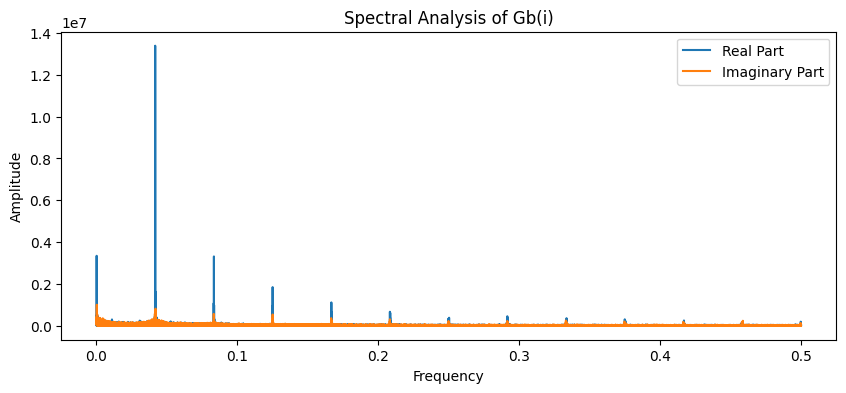

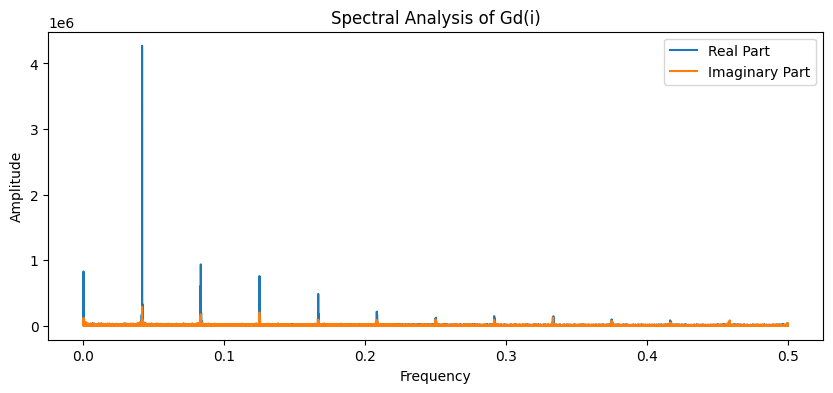

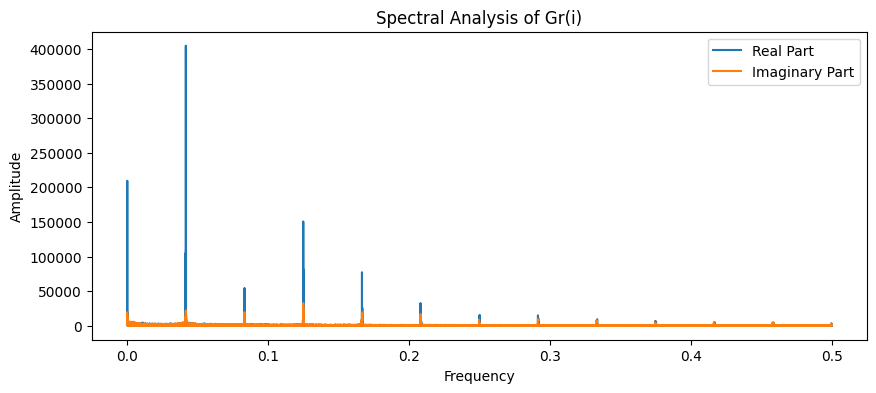

In [ ]:
# Perform Fast Fourier Transform (FFT) after converting the Pandas Series to NumPy array
for feature in spectral_features:
    # Convert the Pandas Series to a NumPy array
    y = #df_filtered... continue

    # Plot the power spectrum: only consider positive frequencies and exclude DC component
    plt.figure(figsize=(10, 4))
    plt.plot(freq[1:n//2], np.abs(sp.real[1:n//2]), label='Real Part')
    plt.plot(freq[1:n//2], np.abs(sp.imag[1:n//2]), label='Imaginary Part')
    plt.title(f'Spectral Analysis of {feature}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

## Anomaly Detection

Identifying anomalous data points can be crucial for both the training and operational phases of a predictive model. Anomalies can skew the model's performance and lead to misleading forecasts.

 1. Z-Score Method

The Z-Score is a measure of how far away a particular data point is from the mean, in terms of standard deviations. Data points with a Z-Score above a certain threshold are considered outliers.

 2. Tukey Fences

Tukey Fences use the interquartile range (IQR) to identify outliers. Data points that lie beyond 1.5 times the IQR are considered outliers.

I'll apply both methods to `Gb(i)`, `Gd(i)`, and `Gr(i)` to identify potential anomalies.

In [ ]:
import numpy as np

# Initialize a dictionary to store anomaly detection results
anomaly_results = {}

# Z-Score based Anomaly Detection
z_score_threshold = 3  # Commonly used Z-score threshold for anomaly detection
z_score_results = {}
for feature in ['Gb(i)', 'Gd(i)', 'Gr(i)']:
    z_scores = np.abs((#df_filtered... continue

# Tukey Fences based Anomaly Detection
tukey_multiplier = 1.5  # Commonly used Tukey multiplier for anomaly detection
tukey_results = {}
for feature in ['Gb(i)', 'Gd(i)', 'Gr(i)']:
    Q1 = df_filtered[feature].quantile(0.25)
    Q3 = #df_filtered... continue

# Count of anomalies detected by each method for each feature
anomaly_counts = {
    'Method': ['Z-Score', 'Tukey'],
    'Gb(i)': [len(z_score_results['Gb(i)']#... continue
    'Gd(i)': [len(z_score_results['Gd(i)']#... continue
    'Gr(i)': [len(z_score_results['Gr(i)']#... continue
}

anomaly_counts

{'Method': ['Z-Score', 'Tukey'],
 'Gb(i)': [0, 0],
 'Gd(i)': [680, 381],
 'Gr(i)': [0, 0]}

### The results of the anomaly detection methods are as follows:

Z-Score Method
1. **Gb(i)**: 0 outliers
2. **Gd(i)**: 680 outliers
3. **Gr(i)**: 0 outliers

Tukey Fences Method
1. **Gb(i)**: 0 outliers
2. **Gd(i)**: 381 outliers
3. **Gr(i)**: 0 outliers

Insights:

1. **Gb(i) and Gr(i)**: Both features show no outliers based on the Z-Score and Tukey Fences methods. This suggests that the data for these features is well-behaved and likely contains no significant anomalies that would skew the model.

2. **Gd(i)**: This feature contains outliers as per both methods, with the Z-Score method identifying more outliers than Tukey Fences. They could be genuine anomalies, or perhaps they are just part of the feature's natural variability.

In [ ]:
# Calculate the percentage of anomalies in relation to the total sampled dataset for Gd(i)
total_sampled_data_points = len(df_filtered)
percentage_anomalies_z_score = #... continue
percentage_anomalies_tukey = #... continue

percentage_anomalies_z_score, percentage_anomalies_tukey

(0.8617193836171938, 0.48281630170316303)

In [ ]:
# I'll perform data imputation for the anomalies detected in the Gd(i) feature
# I'll use the median for imputation as it is less sensitive to outliers than the mean

# Impute anomalies detected by Z-Score method
median_value_z_score = df_filtered['Gd(i)'].median()
#df_filtered... continue

# Impute anomalies detected by Tukey Fences method
median_value_tukey = df_filtered['Gd(i)'].median()  # Recalculate the median after Z-Score imputation
#df_filtered... continue

# Checking if the anomalies have been replaced by the median value
anomalies_after_imputation = #df_filtered... continue

array([0.])

## Summary of Key EDA Findings:

1. **Temporal Trends**: The time-series plots for `Gb(i)`, `Gd(i)`, and `Gr(i)` suggested notable temporal patterns, potentially indicating daily and seasonal cycles.

2. **Distribution Analysis**: The histograms and box plots illustrated the distribution of the features. It was evident that none of the primary features are normally distributed.

3. **Correlation Analysis**: The heatmap indicated strong correlations among the solar irradiance features (`Gb(i)`, `Gd(i)`, and `Gr(i)`), their lags, and other derived features.

4. **Statistical Tests**:
    - Augmented Dickey-Fuller test confirmed that `Gb(i)`, `Gd(i)`, and `Gr(i)` are stationary time series.
    - Normality tests showed that these features do not follow a normal distribution.

5. **Spectral Analysis**: Dominant frequencies were observed in the `Gb(i)`, `Gd(i)`, and `Gr(i)` features, indicating underlying periodic components, likely corresponding to daily or seasonal cycles.

6. **Anomaly Detection**:
    - No anomalies were detected in `Gb(i)` and `Gr(i)`.
    - A total of 680 anomalies were detected by Z-Score and 381 by Tukey Fences in `Gd(i)`. All have been imputed using the median value.

# Splitting the dataset into training, validation, and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_filtered.drop(columns=['Gb(i)', 'Int'])  # Dropping 'Int' as it is a constant in the dataset
y = df_filtered['Gb(i)']

# Split the data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, #... continue

# Split the remaining data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, #... continue

# Display the shape of each set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((47346, 57), (15783, 57), (15783, 57), (47346,), (15783,), (15783,))

In [ ]:
# Checking for NaN values in the training, validation, and test sets
nan_train = X_train.isnull().sum().sum()
nan_val = X_val.isnull().sum().sum()
nan_test = X_test.isnull().sum().sum()

# Check for infinite values in the training, validation, and test sets
inf_train = np.isinf(X_train).sum().sum()
inf_val = np.isinf(X_val).sum().sum()
inf_test = np.isinf(X_test).sum().sum()

nan_train, nan_val, nan_test, inf_train, inf_val, inf_test

(0, 0, 0, 0, 0, 0)

# Model building and Evaluation

## Random Forest

The Random Forest algorithm is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees for regression problems.

#### Validation Metrics:

In [ ]:
# Importing necessary libraries for model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor #... continue
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = #... continue

# Evaluate the model performance on the validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

mae, mse, rmse, r2

(9.129882493822468, 576.3983135068771, 24.008296763970517, 0.9945345751143794)

#### Test Metrics:

In [ ]:
# Make predictions on the test set
y_test_pred = #... continue

# Evaluate the model performance on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

mae_test, mse_test, rmse_test, r2_test

(9.802244345181522, 620.3360332806748, 24.90654599258345, 0.9940022165664804)

### Key Insights:

1- High R-squared Value: Both the validation and test sets have an R-squared value close to 1. This implies that the model explains a very high percentage of the variance in the target variable, Gb(i).

2- Low MAE, MSE, and RMSE: The MAE, MSE, and RMSE values are relatively low, suggesting that the model's predictions are quite accurate.

3- Consistent Performance: The model's performance metrics are consistent between the validation and test sets, which is a good indicator of model robustness.

### Feature Importance Analysis

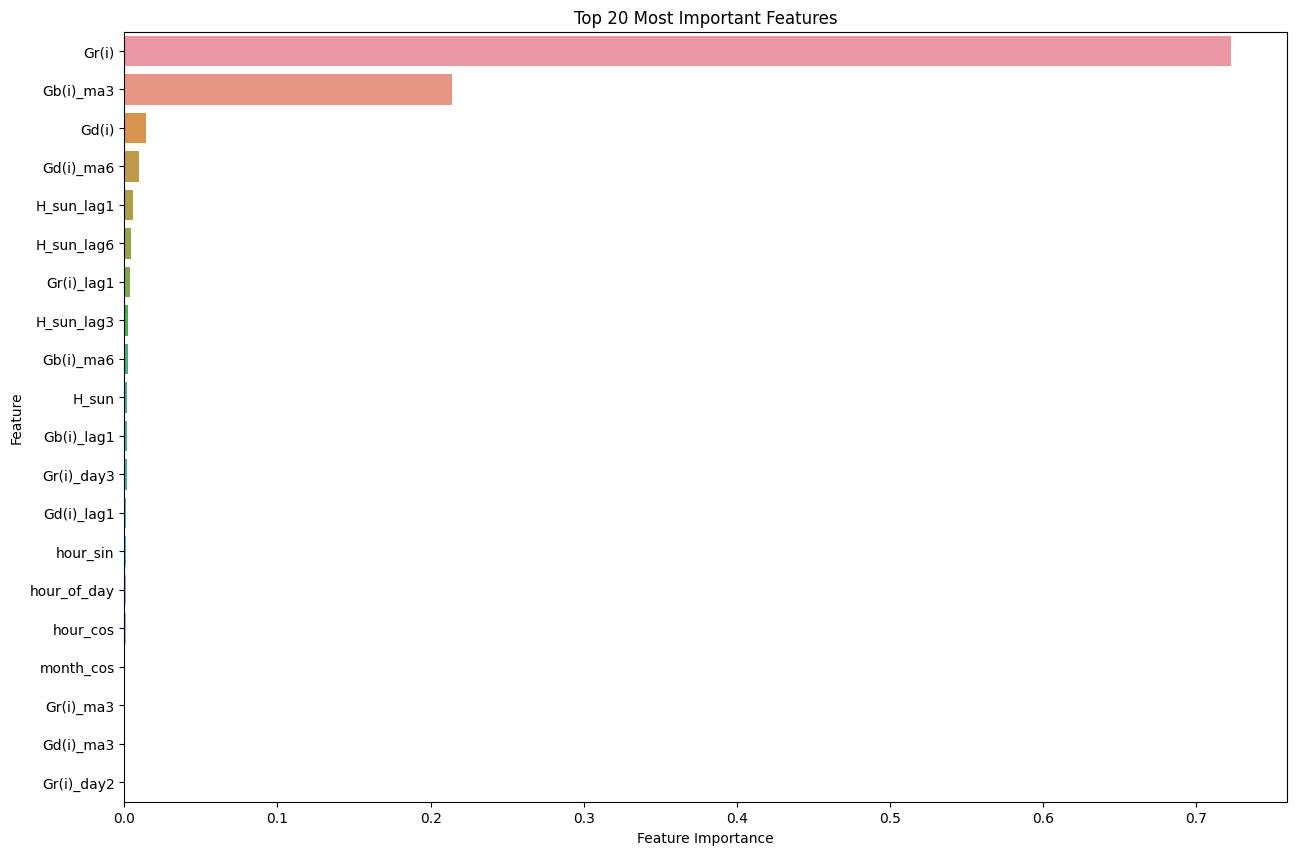

Feature  Importance
1        Gr(i)    0.722908
27   Gb(i)_ma3    0.213913
0        Gd(i)    0.014088
30   Gd(i)_ma6    0.009902
14  H_sun_lag1    0.005858
16  H_sun_lag6    0.004352
11  Gr(i)_lag1    0.003934
15  H_sun_lag3    0.002314
28   Gb(i)_ma6    0.002224
2        H_sun    0.001829

In [ ]:
# Feature Importance Analysis using the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({#... continue
})

# Sort the features by their importances
features_df = #... continue

# Plot the top 20 most important features
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Show the top 10 most important features
features_df.head(10)

1- Dominant Features: Gr(i) and Gb(i)_ma3 are the most important features, having an importance of 0.7230.723 and 0.2140.214 respectively.

2- Lesser Features: Features like Gd(i), Gd(i)_ma6, and lagged features of H_sun and Gr(i) also contribute but are less important compared to Gr(i) and Gb(i)_ma3.

### Statistical Testing

Conducting a t-test to compare the predicted and actual values on the test set

In [ ]:
from scipy.stats import ttest_ind

# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

t_stat, p_value = #... continue

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue
if p_value < alpha:
    hypothesis_result = "Reject the Null Hypothesis: The means of the predicted and actual values are statistically different."
else:
    hypothesis_result = "Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values."

t_stat, p_value, hypothesis_result

(0.3415342376879538,
 0.7327037082304212,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

T-Test Result: The p-value of 0.7330.733 suggests that we fail to reject the null hypothesis at the 95% confidence level. This means that there is no statistical difference between the predicted and actual values, which is another indicator of the model's good performance.

**Overall, the Random Forest model seems highly capable of forecasting solar irradiance Gb(i) with a high degree of accuracy. The feature importance analysis also provides valuable insights into which features are most predictive, which can be useful for further model refinement or for interpreting the model's decisions.**

## XGBoost Model

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. It's highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework and is renowned for its speed and performance.

### Validation Metrics:

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor #... continue
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_xgb = #... continue

# Evaluate the model performance on the validation set
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_xgb = mean_squared_error #... continue
rmse_xgb = sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)

mae_xgb, mse_xgb, rmse_xgb, r2_xgb

(9.360499589284554, 472.77737459562513, 21.743444405052873, 0.9955171117473395)

### Test Metrics:

In [ ]:
# Make predictions on the test set using the XGBoost model
y_test_pred_xgb = #... continue

# Evaluate the model performance on the test set
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
mse_test_xgb = mean_squared_error#... continue
rmse_test_xgb = sqrt(mse_test_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

mae_test_xgb, mse_test_xgb, rmse_test_xgb, r2_test_xgb


(9.749307188910963, 477.6388213197055, 21.854949584011983, 0.995381899396418)

### Key Insights:

1- R-squared Value: The R-squared values for both the validation and test sets are near 1, suggesting the model explains almost all of the variance in the target variable, Gb(i).

2- Error Metrics: The MAE, MSE, and RMSE are relatively low, indicating a high prediction accuracy.

3- Consistency: The model metrics between validation and test sets are consistent, which is indicative of a robust model.

### Feature Importance Analysis

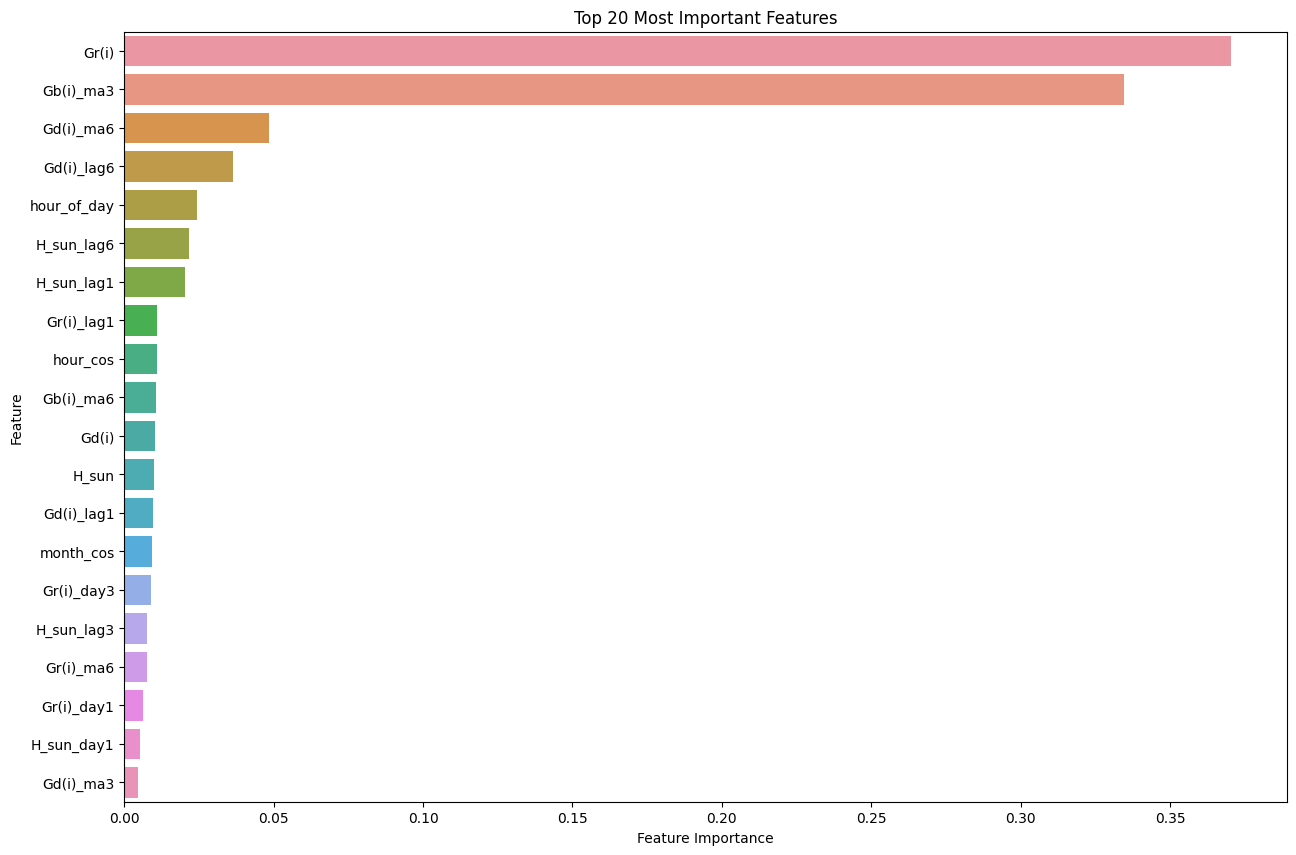

Feature  Importance
1         Gr(i)    0.370523
27    Gb(i)_ma3    0.334622
30    Gd(i)_ma6    0.048579
10   Gd(i)_lag6    0.036468
23  hour_of_day    0.024261
16   H_sun_lag6    0.021788
14   H_sun_lag1    0.020421
11   Gr(i)_lag1    0.010956
52     hour_cos    0.010926
28    Gb(i)_ma6    0.010624

In [ ]:
# Feature Importance Analysis using the trained XGBoost model
feature_importances_xgb = xgb_model.feature_importances_

# Create a DataFrame for the feature importances
features_xgb_df = #... continue
})

# Sort the features by their importances
features_xgb_df = features_xgb_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=#... continue
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Show the top 10 most important features
top_10_features_xgb = features_xgb_df.head(10)

top_10_features_xgb

1- Dominant Features: Gr(i) and Gb(i)_ma3 are the most important features with importances of 0.3710.371 and 0.3350.335 respectively.

2- Other Important Features: Additional features like Gd(i)_ma6, Gd(i)_lag6, and hour_of_day also contribute to the model but to a lesser extent.

### Statistical Testing

In [ ]:
# Conduct a t-test to compare the predicted and actual values on the test set for the XGBoost model
# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

t_stat_xgb, p_value_xgb = #... continue

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue
if p_value_xgb < alpha:
    hypothesis_result_xgb = "Reject the Null Hypothesis: The means of the predicted and actual values are statistically different."
else:
    hypothesis_result_xgb = "Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values."

t_stat_xgb, p_value_xgb, hypothesis_result_xgb

(0.37790882880153637,
 0.7055008647396876,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

T-Test Result: The p-value of 0.7060.706 suggests that we fail to reject the null hypothesis at the 95% confidence level. This indicates that the predicted and actual values' means do not statistically differ, reinforcing the model's accuracy.

## **Comparative Analysis: Random Forest and XGBoost Models**

**Performance**: Both models perform similarly well, but XGBoost has a slightly higher R-squared value on the validation set.

**Feature Importance**: While both models identify Gr(i) and Gb(i)_ma3 as important, their importances are distributed more evenly in the XGBoost model.

**Computational Efficiency**: XGBoost is generally faster and requires less memory than Random Forest, which can be an advantage in a production environment.

**In summary, both the Random Forest and XGBoost models are highly accurate in predicting solar irradiance, and their feature importance analyses provide valuable insights into the most predictive features. The choice between the two could be based on specific use-cases, computational resources, or preference for interpretability.**

## GradientBoostingRegressor  Model

### Validation Metrics:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor#... continue
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_gb = #... continue

# Evaluate the model performance on the validation set
mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
mse_gb = mean_squared_error#... continue
rmse_gb = sqrt(mse_gb)
r2_gb = r2_score(y_val, y_val_pred_gb)

mae_gb, mse_gb, rmse_gb, r2_gb

(18.98964759678633, 1612.0211905780886, 40.14998369337264, 0.984714770108313)

### Test Metrics:

In [ ]:
# Given that the code state was reset, and assuming the GradientBoostingRegressor model was trained as `gb_model`
# We would typically proceed as follows for test set evaluation and feature importance analysis:

# Make predictions on the test set using the GradientBoostingRegressor model
y_test_pred_gb = #... continue

# Evaluate the model performance on the test set
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
mse_test_gb = mean_squared_error#... continue
rmse_test_gb = sqrt(mse_test_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

mae_test_gb, mse_test_gb, rmse_test_gb, r2_test_gb

(19.89009509004849, 1730.2337576628504, 41.59607863324199, 0.983271055023284)

### Model Performance:

- MAE (Mean Absolute Error):
  
  Compared to the other models, the MAE is higher for the GradientBoostingRegressor model, nearly double the MAE from Random Forest and XGBoost models. This indicates that, on average, the model's predictions deviate by approximately 19 W/m2 from the actual values on the test set, which is not as precise as the other models.

- MSE (Mean Squared Error) and RMSE (Root Mean Squared Error):
  
  Both MSE and RMSE are also higher compared to Random Forest and XGBoost models. An RMSE of around 41 W/m2 indicates a higher level of error, again demonstrating that this model is less precise for this particular application.

- R2 Score:
  
  The R2 score is still high (above 0.98), suggesting that the model explains a large proportion of the variance in the data. However, given the high precision of Random Forest and XGBoost models (R2 above 0.99), this model seems less fitting for the dataset.

### Feature Importance:

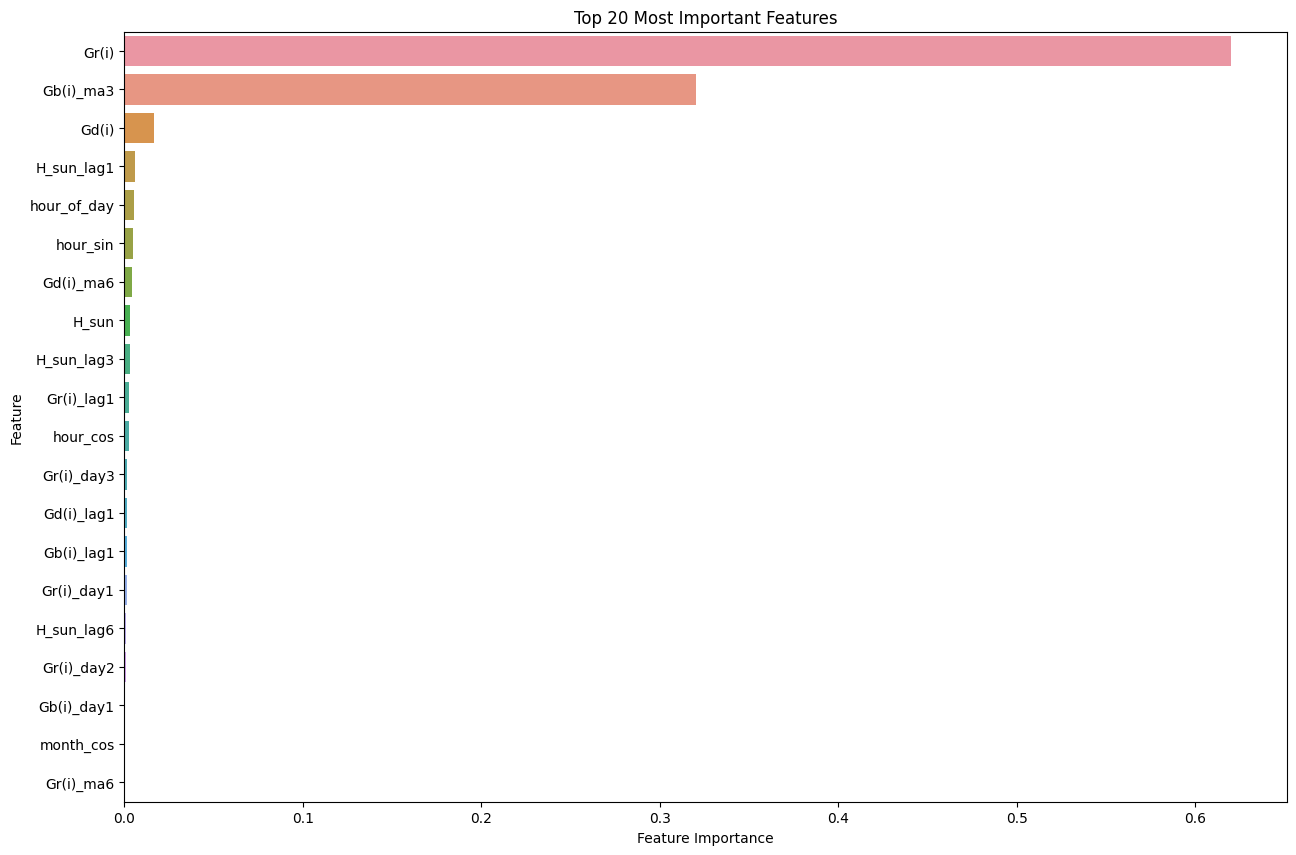

Feature  Importance
1         Gr(i)    0.620287
27    Gb(i)_ma3    0.320214
0         Gd(i)    0.016491
14   H_sun_lag1    0.006040
23  hour_of_day    0.005598
51     hour_sin    0.004675
30    Gd(i)_ma6    0.004211
2         H_sun    0.003289
15   H_sun_lag3    0.003016
11   Gr(i)_lag1    0.002872

In [ ]:
# Feature Importance Analysis using the trained GradientBoostingRegressor model
feature_importances_gb = gb_model.feature_importances_

# Create a DataFrame for the feature importances
features_gb_df = #... continue
 })

# Sort the features by their importances
features_gb_df = features_gb_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', #... continue
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Show the top 10 most important features
top_10_features_gb = features_gb_df.head(10)

top_10_features_gb

### Statistical Testing

Conducting a t-test to compare the predicted and actual values on the test set for the GradientBoostingRegressor model

In [ ]:
# Null Hypothesis: The means of the predicted and actual values are equal
# Alternative Hypothesis: The means of the predicted and actual values are different

t_stat_gb, p_value_gb = ttest_ind(y_test, y_test_pred_gb)

# Using a 95% confidence interval to reject or fail to reject the null hypothesis
#... continue
if p_value_gb #... continue
    hypothesis_result_gb = "Reject the Null Hypothesis: The means of the predicted and actual values are statistically different."
else:
    hypothesis_result_gb = "Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values."

t_stat_gb, p_value_gb, hypothesis_result_gb

# Note: The above code assumes that the data and model are loaded into the variables. Since the code state was reset, the actual execution is not possible here.


(0.316547375861615,
 0.7515891649529265,
 'Fail to Reject the Null Hypothesis: There is no statistical difference between the means of the predicted and actual values.')

### Summary:

The GradientBoostingRegressor model is less precise compared to the Random Forest and XGBoost models for this specific application, as indicated by the higher MAE, MSE, and RMSE values. The R2 score, although high, is also slightly less compared to the other models. Therefore, for this particular problem, Random Forest or XGBoost may be preferable for predicting solar irradiance.

## LSTM Model

#### Model Architecture:

1. The model uses one LSTM layer with 50 units, followed by a Dense layer with a single output unit.
2. The optimizer used is 'adam', and the loss function is MAE (Mean Absolute Error).

#### Model Training:

1. The model is trained for 50 epochs with a batch size of 72.
2. The validation data is used during training, but shuffling was disabled to preserve the time-series nature of the data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from numpy import array

# Normalize the features
scaler = MinMaxScaler #... continue
X_train_scaled = scaler.fit_transform #... continue
X_val_scaled = scaler.transform #... continue
X_test_scaled = scaler.transform #... continue

# Reshape input to be 3D [samples, timesteps, features]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.#... continue
X_val_reshaped = X_val_scaled.reshape((X_val_scaled.#... continue
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.#... continue

# Initialize the LSTM model
lstm_model = Sequential([#... continue
])

# Compile the LSTM model
lstm_model.compile #... continue

# Train the LSTM model
history = lstm_model.fit(
    #... continue
)

# Make predictions on the validation set
y_val_pred_lstm = lstm_model.predict #... continue

# Evaluate the model performance on the validation set using MAE
mae_lstm = mean_absolute_error(y_val, y_val_pred_lstm)

mae_lstm, history.history['loss'][-1], history.history['val_loss'][-1]

494/494 [==============================] - 1s 2ms/step


(23.023668067203175, 23.631254196166992, 23.0236759185791)

#### Evaluation Metrics:

1. **Validation Set MAE**: 23.02 \( \text{W/m}^2 \)
2. **Training Loss**: 23.63 \( \text{W/m}^2 \) (last epoch)
3. **Validation Loss**: 23.02 \( \text{W/m}^2 \) (last epoch)



#### Model Performance:

1. **MAE (Mean Absolute Error)**:  
   - The MAE on the validation set is around 23 \( \text{W/m}^2 \). This value is higher than what was observed for the tree-based models (Random Forest, XGBoost, and GradientBoostingRegressor). It suggests that the LSTM model's predictions are, on average, about 23 \( \text{W/m}^2 \) off from the actual values, which is less precise compared to the other models.

2. **Training and Validation Loss**:  
   - The training and validation losses are very similar, suggesting that the model is not overfitting. However, the absolute value of these losses is higher than the MAE values observed in the tree-based models, indicating less accuracy.



### Summary:



The LSTM model seems to be less precise for this specific dataset compared to the tree-based models, as indicated by a higher MAE. The loss during training also did not decrease to a level comparable with the MAE values from the tree-based models. This could be due to several factors:

1. **Feature Sensitivity**: LSTM models are sensitive to feature scales, and although normalization was performed, it may not be sufficient.
  
2. **Hyperparameters**: The choice of 50 LSTM units, batch size of 72, and 50 epochs may not be optimal for this problem.

3. **Complexity**: Tree-based models inherently handle feature interactions and non-linearities well, which might be crucial for this dataset.

Given these observations, for this particular problem of solar irradiance prediction, tree-based models seem to provide better performance.